In [1]:
import gc

import numpy as np
import pandas as pd

import japanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
# sns.set(font='IPAexGothic')

from IPython.display import display, Image
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)

In [2]:
!pwd

/Users/kenta_kasugai/competition/nishika_akutagawa/notebook


In [5]:
negaposi_sentence_split10 = pd.read_csv("../input/feature_negaposi_sentence_split10.csv", index_col=0)
negaposi_describe = pd.read_csv("../input/feature_negaposi_describe.csv", index_col=0)
word_count100_tfidf = pd.read_csv("../input/feature_word_count100_tfidf.csv", index_col=0)
word_count100_tfidf_pca1000 = pd.read_csv("../input/feature_word_count100_tfidf_pca1000.csv", index_col=0)
katsuyo0_freq = pd.read_csv("../input/feature_katsuyo0_freq.csv", index_col=0)
katsuyo01_freq = pd.read_csv("../input/feature_katsuyo01_freq.csv", index_col=0)
adjective012_freq = pd.read_csv("../input/feature_adjective012_freq.csv", index_col=0)
adjective01_freq = pd.read_csv("../input/feature_adjective01_freq.csv", index_col=0)
adjective0_freq = pd.read_csv("../input/feature_adjective0_freq.csv", index_col=0)
hyoki = pd.read_csv("../input/feature_hyoki.csv", index_col=0)

In [6]:
print(negaposi_sentence_split10.shape)
print(negaposi_describe.shape)
print(word_count100_tfidf.shape)
print(word_count100_tfidf_pca1000.shape)
print(katsuyo0_freq.shape)
print(katsuyo01_freq.shape)
print(adjective012_freq.shape)
print(adjective01_freq.shape)
print(adjective0_freq.shape)
print(hyoki.shape)

(4396, 10)
(4732, 5)
(4732, 9502)
(4732, 1000)
(4732, 58)
(4732, 348)
(4732, 67)
(4732, 67)
(4732, 14)
(4732, 14)


In [7]:
data = pd.concat([negaposi_sentence_split10,
                  negaposi_describe,
                  word_count100_tfidf,
                  word_count100_tfidf_pca1000,
                  katsuyo0_freq,
                  katsuyo01_freq,
                  adjective012_freq,
                  adjective01_freq,
                  adjective0_freq,
                  hyoki,
                  ], axis=1)

In [8]:
data

,negaposi_split_0,negaposi_split_1,negaposi_split_2,negaposi_split_3,negaposi_split_4,negaposi_split_5,negaposi_split_6,negaposi_split_7,negaposi_split_8,negaposi_split_9,count,mean,std,min,max,ああ_tfidf,あい_tfidf,あいかわらず_tfidf,あいさつ_tfidf,あいだ_tfidf,あいつ_tfidf,あいにく_tfidf,あいまい_tfidf,あう_tfidf,あか_tfidf,あかい_tfidf,あかり_tfidf,あがる_tfidf,あき_tfidf,あきらか_tfidf,あきらめ_tfidf,あきらめる_tfidf,あきる_tfidf,あきれる_tfidf,あく_tfidf,あくどい_tfidf,あくび_tfidf,あくまで_tfidf,あくまでも_tfidf,あぐら_tfidf,あける_tfidf,あげく_tfidf,あげる_tfidf,あこがれ_tfidf,あこがれる_tfidf,あご_tfidf,あさい_tfidf,あさましい_tfidf,あざ_tfidf,あざやか_tfidf,あし_tfidf,あした_tfidf,あす_tfidf,あすこ_tfidf,あずかる_tfidf,あずける_tfidf,あせる_tfidf,あそこ_tfidf,あそぶ_tfidf,あたかも_tfidf,あたし_tfidf,あたたかい_tfidf,あたら_tfidf,あたり_tfidf,あたりまえ_tfidf,あたり前_tfidf,あたる_tfidf,あだな_tfidf,あちこち_tfidf,あちら_tfidf,あっ_tfidf,あっけ_tfidf,あっさり_tfidf,あっし_tfidf,あっち_tfidf,あつい_tfidf,あつかう_tfidf,あつまる_tfidf,あつめる_tfidf,あて_tfidf,あてる_tfidf,あと_tfidf,あな_tfidf,あながち_tfidf,あなた_tfidf,あに_tfidf,あにい_tfidf,あの_tfidf,あはれ_tfidf,あばれる_tfidf,あびる_tfidf,あふる_tfidf,あふれる_tfidf,あぶない_tfidf,あぶる_tfidf,あべこべ_tfidf,あま_tfidf,あまり_tfidf,あまりに_tfidf,あまる_tfidf,...,記号括弧閉*,記号括弧開*,記号空白*,記号読点*,連体詞**,BOS/EOS**,その他間投*,フィラー**,副詞一般*,副詞助詞類接続*,助動詞**,助詞並立助詞*,助詞係助詞*,助詞副助詞*,助詞副助詞／並立助詞／終助詞*,助詞副詞化*,助詞接続助詞*,助詞格助詞一般,助詞格助詞引用,助詞格助詞連語,助詞特殊*,助詞終助詞*,助詞連体化*,動詞接尾*,動詞自立*,動詞非自立*,名詞サ変接続*,名詞ナイ形容詞語幹*,名詞一般*,名詞代名詞一般,名詞代名詞縮約,名詞副詞可能*,名詞動詞非自立的*,名詞固有名詞一般,名詞固有名詞人名,名詞固有名詞地域,名詞固有名詞組織,名詞引用文字列*,名詞形容動詞語幹*,名詞接尾サ変接続,名詞接尾一般,名詞接尾人名,名詞接尾副詞可能,名詞接尾助動詞語幹,名詞接尾助数詞,名詞接尾地域,名詞接尾形容動詞語幹,名詞接尾特殊,名詞接続詞的*,名詞数*,名詞特殊助動詞語幹,名詞非自立一般,名詞非自立副詞可能,名詞非自立助動詞語幹,名詞非自立形容動詞語幹,形容詞接尾*,形容詞自立*,形容詞非自立*,感動詞**,接続詞**,接頭詞動詞接続*,接頭詞名詞接続*,接頭詞形容詞接続*,接頭詞数接続*,記号アルファベット*,記号一般*,記号句点*,記号括弧閉*,記号括弧開*,記号空白*,記号読点*,連体詞**,BOS/EOS,その他,フィラー,副詞,助動詞,助詞,動詞,名詞,形容詞,感動詞,接続詞,接頭詞,記号,連体詞,letter_number,kanji,hiragana,katakana,digit,alphabet,old_kanji,old_hiragana,old,lowercase,hagyo,kakko,kagikakko,kutoten
0,-0.189030,-0.130570,-0.175781,-0.159920,-0.241814,-0.230414,-0.068126,-0.187654,-0.146884,-0.111569,14.0,-0.152729,0.053904,-0.241814,-0.068126,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033818,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.009346,0.009346,0.014019,0.056075,0.014019,0.004673,0.000000,0.009346,0.009346,0.007009,0.102804,0.002336,0.051402,0.007009,0.000000,0.002336,0.030374,0.116822,0.007009,0.004673,0.000000,0.000000,0.051402,0.004673,0.098131,0.018692,0.035047,0.002336,0.130841,0.028037,0.000000,0.004673,0.000000,0.000000,0.011682,0.000000,0.000000,0.0,0.016355,0.000000,0.009346,0.000000,0.000000,0.000000,0.000000,0.000000,0.002336,0.002336,0.000000,0.000000,0.000000,0.035047,0.002336,0.002336,0.000000,0.002336,0.014019,0.002336,0.000000,0.007009,0.000000,0.000000,0.000000,0.000000,0.000000,0.028037,0.032710,0.009346,0.009346,0.014019,0.056075,0.014019,0.004673,0.000000,0.009346,0.016355,0.102804,0.273364,0.121495,0.282710,0.018692,0.000000,0.007009,0.000000,0.149533,0.014019,651.0,0.298003,0.594470,0.036866,0.000000,0.000000,0.001536,0.000000,0.001536,0.007680,0.016897,0.000000,0.012289,0.058372
1,-0.112867,-0.149643,-0.163352,-0.187332,-0.184833,-0.069419,-0.144469,-0.173366,-0.115937,-0.085715,20.0,-0.138693,0.054466,-0.250899,-0.037045,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0000

In [9]:
del negaposi_sentence_split10
del negaposi_describe
del word_count100_tfidf
del word_count100_tfidf_pca1000
del katsuyo0_freq
del katsuyo01_freq
del adjective012_freq
del adjective01_freq
del adjective0_freq
del hyoki

gc.collect()

14

negaposi_sentence_split10
negaposi_describe
word_count100_tfidf
word_count100_tfidf_pca1000
katsuyo0_freq
katsuyo01_freq
adjective012_freq
adjective01_freq
adjective0_freq
hyoki

In [10]:
y = pd.read_csv("../input/target.csv", index_col=0, names=["target"])

In [11]:
y.head()

,target
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0


In [12]:
train_index = y[y["target"].notna()].index
test_index = y[y["target"].isna()].index

In [13]:
X_train_valid = data.iloc[train_index]
X_test = data.iloc[test_index]
y_train_valid = y.iloc[train_index]
y_train_valid = y_train_valid.astype(int)

In [14]:
del data, y
gc.collect()

0

# 学習・予測

In [2]:
# !pip install optuna

In [72]:
import lightgbm as lgb_original
import optuna.integration.lightgbm as lgb
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

### ハイパラ調整

### hold out

In [15]:
col_name = X_train_valid.columns.values
X_train_valid.columns = range(X_train_valid.shape[1])
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.3, random_state=0, stratify=y_train_valid)

In [16]:
train = lgb_original.Dataset(X_train, label=y_train)
valid = lgb_original.Dataset(X_valid, label=y_valid)

In [92]:
# https://stackoverflow.com/questions/50931168/f1-score-metric-in-lightgbm
def lgb_originalf1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
    return 'f1', f1_score(y_true, y_hat), True

In [121]:
%%time
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'random_state': 0,
#     'max_depth': trial.suggest_int('max_depth', 3, 7),
}
best_params, history = {}, []
evals_result = {}

model = lgb.train(params=params,
                  train_set=train,
                  valid_sets=[train, valid],
                  valid_names=['train', 'valid'],
#                   feval=lgb_originalf1_score,
                  num_boost_round=1000,
                  early_stopping_rounds=100,
                  verbose_eval=10,
                  evals_result=evals_result,
                  best_params=best_params,
                  tuning_history=history
                 )













  0%|          | 0/7 [00:00<?, ?it/s]











tune_feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.0711307	valid's binary_logloss: 0.107077
[20]	train's binary_logloss: 0.027795	valid's binary_logloss: 0.0659412
[30]	train's binary_logloss: 0.011469	valid's binary_logloss: 0.0499515
[40]	train's binary_logloss: 0.00481977	valid's binary_logloss: 0.0427891
[50]	train's binary_logloss: 0.00204059	valid's binary_logloss: 0.039871
[60]	train's binary_logloss: 0.000867419	valid's binary_logloss: 0.0397594
[70]	train's binary_logloss: 0.000367288	valid's binary_logloss: 0.0399377
[80]	train's binary_logloss: 0.000158129	valid's binary_logloss: 0.0419326
[90]	train's binary_logloss: 6.83913e-05	valid's binary_logloss: 0.0434769
[100]	train's binary_logloss: 2.97827e-05	valid's binary_logloss: 0.0459603
[110]	train's binary_logloss: 1.34777e-05	valid's binary_logloss: 0.0470966
[120]	train's binary_logloss: 6.93481e-06	valid's binary_logloss: 0.0487856
[130]	train's binary_logloss: 4.13564e-06	valid













tune_feature_fraction, val_score: 0.039283:   0%|          | 0/7 [00:14<?, ?it/s]











tune_feature_fraction, val_score: 0.039283:  14%|#4        | 1/7 [00:14<01:27, 14.67s/it][I 2020-01-26 23:41:55,628] Finished trial#0 resulted in value: 0.0392833441073146. Current best value is 0.0392833441073146 with parameters: {'feature_fraction': 0.4}.












tune_feature_fraction, val_score: 0.039283:  14%|#4        | 1/7 [00:14<01:27, 14.67s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.0703351	valid's binary_logloss: 0.106379
[20]	train's binary_logloss: 0.0274874	valid's binary_logloss: 0.0643223
[30]	train's binary_logloss: 0.0113677	valid's binary_logloss: 0.0488921
[40]	train's binary_logloss: 0.00474935	valid's binary_logloss: 0.0411906
[50]	train's binary_logloss: 0.00198975	valid's binary_logloss: 0.0390611
[60]	train's binary_logloss: 0.000843061	valid's binary_logloss: 0.038564
[70]	train's binary_logloss: 0.000360631	valid's binary_logloss: 0.0387004
[80]	train's binary_logloss: 0.000150299	valid's binary_logloss: 0.0418697
[90]	train's binary_logloss: 6.31378e-05	valid's binary_logloss: 0.0425764
[100]	train's binary_logloss: 2.73157e-05	valid's binary_logloss: 0.0449547
[110]	train's binary_logloss: 1.2535e-05	valid's binary_logloss: 0.0465523
[120]	train's binary_logloss: 6.45755e-06	valid's binary_logloss: 0.0464747
[130]	train's binary_logloss: 3.83626e-06	vali













tune_feature_fraction, val_score: 0.038479:  14%|#4        | 1/7 [00:29<01:27, 14.67s/it]











tune_feature_fraction, val_score: 0.038479:  29%|##8       | 2/7 [00:29<01:12, 14.57s/it][I 2020-01-26 23:42:09,980] Finished trial#1 resulted in value: 0.03847930928489789. Current best value is 0.03847930928489789 with parameters: {'feature_fraction': 0.5}.












tune_feature_fraction, val_score: 0.038479:  29%|##8       | 2/7 [00:29<01:12, 14.57s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.0680319	valid's binary_logloss: 0.0960298
[20]	train's binary_logloss: 0.0267966	valid's binary_logloss: 0.0587078
[30]	train's binary_logloss: 0.0109155	valid's binary_logloss: 0.0463263
[40]	train's binary_logloss: 0.00450499	valid's binary_logloss: 0.0395529
[50]	train's binary_logloss: 0.00187798	valid's binary_logloss: 0.0376223
[60]	train's binary_logloss: 0.00079554	valid's binary_logloss: 0.0376856
[70]	train's binary_logloss: 0.000337473	valid's binary_logloss: 0.0396042
[80]	train's binary_logloss: 0.000141751	valid's binary_logloss: 0.0430605
[90]	train's binary_logloss: 5.97707e-05	valid's binary_logloss: 0.0449771
[100]	train's binary_logloss: 2.57508e-05	valid's binary_logloss: 0.0451894
[110]	train's binary_logloss: 1.19608e-05	valid's binary_logloss: 0.0474588
[120]	train's binary_logloss: 6.03763e-06	valid's binary_logloss: 0.0475416
[130]	train's binary_logloss: 3.52628e-06	va













tune_feature_fraction, val_score: 0.037127:  29%|##8       | 2/7 [00:47<01:12, 14.57s/it]











tune_feature_fraction, val_score: 0.037127:  43%|####2     | 3/7 [00:47<01:03, 15.79s/it][I 2020-01-26 23:42:28,624] Finished trial#2 resulted in value: 0.03712666891046938. Current best value is 0.03712666891046938 with parameters: {'feature_fraction': 0.6}.












tune_feature_fraction, val_score: 0.037127:  43%|####2     | 3/7 [00:47<01:03, 15.79s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.0675601	valid's binary_logloss: 0.0989723
[20]	train's binary_logloss: 0.0261607	valid's binary_logloss: 0.0601007
[30]	train's binary_logloss: 0.0107539	valid's binary_logloss: 0.0472619
[40]	train's binary_logloss: 0.00437873	valid's binary_logloss: 0.0423455
[50]	train's binary_logloss: 0.00183009	valid's binary_logloss: 0.0412714
[60]	train's binary_logloss: 0.000763855	valid's binary_logloss: 0.0390833
[70]	train's binary_logloss: 0.000319686	valid's binary_logloss: 0.0401605
[80]	train's binary_logloss: 0.000135548	valid's binary_logloss: 0.0418863
[90]	train's binary_logloss: 5.66938e-05	valid's binary_logloss: 0.043036
[100]	train's binary_logloss: 2.4206e-05	valid's binary_logloss: 0.044722
[110]	train's binary_logloss: 1.11542e-05	valid's binary_logloss: 0.0450045
[120]	train's binary_logloss: 5.74598e-06	valid's binary_logloss: 0.0455346
[130]	train's binary_logloss: 3.46874e-06	vali













tune_feature_fraction, val_score: 0.037127:  43%|####2     | 3/7 [01:09<01:03, 15.79s/it]











tune_feature_fraction, val_score: 0.037127:  57%|#####7    | 4/7 [01:09<00:52, 17.57s/it][I 2020-01-26 23:42:50,335] Finished trial#3 resulted in value: 0.038850398179080245. Current best value is 0.03712666891046938 with parameters: {'feature_fraction': 0.6}.












tune_feature_fraction, val_score: 0.037127:  57%|#####7    | 4/7 [01:09<00:52, 17.57s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.068068	valid's binary_logloss: 0.0991629
[20]	train's binary_logloss: 0.0263179	valid's binary_logloss: 0.0611748
[30]	train's binary_logloss: 0.0106131	valid's binary_logloss: 0.0479272
[40]	train's binary_logloss: 0.00431463	valid's binary_logloss: 0.0430333
[50]	train's binary_logloss: 0.00180253	valid's binary_logloss: 0.0405689
[60]	train's binary_logloss: 0.000758118	valid's binary_logloss: 0.0404515
[70]	train's binary_logloss: 0.000317398	valid's binary_logloss: 0.0426328
[80]	train's binary_logloss: 0.000134833	valid's binary_logloss: 0.0431576
[90]	train's binary_logloss: 5.66651e-05	valid's binary_logloss: 0.0440653
[100]	train's binary_logloss: 2.41353e-05	valid's binary_logloss: 0.0453596
[110]	train's binary_logloss: 1.11915e-05	valid's binary_logloss: 0.0471988
[120]	train's binary_logloss: 5.70108e-06	valid's binary_logloss: 0.0449991
[130]	train's binary_logloss: 3.39066e-06	va













tune_feature_fraction, val_score: 0.037127:  57%|#####7    | 4/7 [01:29<00:52, 17.57s/it]











tune_feature_fraction, val_score: 0.037127:  71%|#######1  | 5/7 [01:29<00:36, 18.32s/it][I 2020-01-26 23:43:10,406] Finished trial#4 resulted in value: 0.03992856089361831. Current best value is 0.03712666891046938 with parameters: {'feature_fraction': 0.6}.












tune_feature_fraction, val_score: 0.037127:  71%|#######1  | 5/7 [01:29<00:36, 18.32s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.0674006	valid's binary_logloss: 0.0937198
[20]	train's binary_logloss: 0.0263061	valid's binary_logloss: 0.0613881
[30]	train's binary_logloss: 0.0105254	valid's binary_logloss: 0.0492208
[40]	train's binary_logloss: 0.00431682	valid's binary_logloss: 0.0431715
[50]	train's binary_logloss: 0.00181186	valid's binary_logloss: 0.0407465
[60]	train's binary_logloss: 0.000753965	valid's binary_logloss: 0.0398489
[70]	train's binary_logloss: 0.000311934	valid's binary_logloss: 0.0402883
[80]	train's binary_logloss: 0.000129532	valid's binary_logloss: 0.0410258
[90]	train's binary_logloss: 5.46315e-05	valid's binary_logloss: 0.0422727
[100]	train's binary_logloss: 2.35064e-05	valid's binary_logloss: 0.0428582
[110]	train's binary_logloss: 1.09325e-05	valid's binary_logloss: 0.044751
[120]	train's binary_logloss: 5.7023e-06	valid's binary_logloss: 0.0459211
[130]	train's binary_logloss: 3.34292e-06	val













tune_feature_fraction, val_score: 0.037127:  71%|#######1  | 5/7 [01:52<00:36, 18.32s/it]











tune_feature_fraction, val_score: 0.037127:  86%|########5 | 6/7 [01:52<00:19, 19.60s/it][I 2020-01-26 23:43:32,992] Finished trial#5 resulted in value: 0.03957757243721282. Current best value is 0.03712666891046938 with parameters: {'feature_fraction': 0.6}.












tune_feature_fraction, val_score: 0.037127:  86%|########5 | 6/7 [01:52<00:19, 19.60s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.0666732	valid's binary_logloss: 0.0932624
[20]	train's binary_logloss: 0.0262244	valid's binary_logloss: 0.0631203
[30]	train's binary_logloss: 0.0106422	valid's binary_logloss: 0.0510577
[40]	train's binary_logloss: 0.00436651	valid's binary_logloss: 0.0450102
[50]	train's binary_logloss: 0.00179718	valid's binary_logloss: 0.0428073
[60]	train's binary_logloss: 0.000741956	valid's binary_logloss: 0.0418758
[70]	train's binary_logloss: 0.000307759	valid's binary_logloss: 0.0428609
[80]	train's binary_logloss: 0.000127944	valid's binary_logloss: 0.0440005
[90]	train's binary_logloss: 5.36916e-05	valid's binary_logloss: 0.0456733
[100]	train's binary_logloss: 2.30213e-05	valid's binary_logloss: 0.0464019
[110]	train's binary_logloss: 1.05264e-05	valid's binary_logloss: 0.0477457
[120]	train's binary_logloss: 5.51521e-06	valid's binary_logloss: 0.0477729
[130]	train's binary_logloss: 3.33287e-06	v













tune_feature_fraction, val_score: 0.037127:  86%|########5 | 6/7 [02:16<00:19, 19.60s/it]











tune_feature_fraction, val_score: 0.037127: 100%|##########| 7/7 [02:16<00:00, 21.04s/it][I 2020-01-26 23:43:57,393] Finished trial#6 resulted in value: 0.04187576035583885. Current best value is 0.03712666891046938 with parameters: {'feature_fraction': 0.6}.
























  0%|          | 0/20 [00:00<?, ?it/s]











tune_num_leaves, val_score: 0.037127:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.068031	valid's binary_logloss: 0.0960327
[20]	train's binary_logloss: 0.0267988	valid's binary_logloss: 0.0589276
[30]	train's binary_logloss: 0.0109014	valid's binary_logloss: 0.0458203
[40]	train's binary_logloss: 0.0045097	valid's binary_logloss: 0.0383119
[50]	train's binary_logloss: 0.00188024	valid's binary_logloss: 0.0364601
[60]	train's binary_logloss: 0.000788072	valid's binary_logloss: 0.0360617
[70]	train's binary_logloss: 0.000333839	valid's binary_logloss: 0.0377723
[80]	train's binary_logloss: 0.000140325	valid's binary_logloss: 0.0405647
[90]	train's binary_logloss: 5.93308e-05	valid's binary_logloss: 0.041779
[100]	train's binary_logloss: 2.56984e-05	valid's binary_logloss: 0.0433072
[110]	train's binary_logloss: 1.17526e-05	valid's binary_logloss: 0.0440951
[120]	train's binary_logloss: 6.11298e-06	valid's binary_logloss: 0.0450675
[130]	train's binary_logloss: 3.59268e-06	vali













tune_num_leaves, val_score: 0.035257:   0%|          | 0/20 [00:39<?, ?it/s]











tune_num_leaves, val_score: 0.035257:   5%|5         | 1/20 [00:39<12:28, 39.42s/it][I 2020-01-26 23:44:36,894] Finished trial#0 resulted in value: 0.03525665125247881. Current best value is 0.03525665125247881 with parameters: {'num_leaves': 233}.












tune_num_leaves, val_score: 0.035257:   5%|5         | 1/20 [00:39<12:28, 39.42s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.0680313	valid's binary_logloss: 0.09603
[20]	train's binary_logloss: 0.026795	valid's binary_logloss: 0.0587087
[30]	train's binary_logloss: 0.0109144	valid's binary_logloss: 0.0463277
[40]	train's binary_logloss: 0.00450431	valid's binary_logloss: 0.0395535
[50]	train's binary_logloss: 0.00187434	valid's binary_logloss: 0.0381301
[60]	train's binary_logloss: 0.000790339	valid's binary_logloss: 0.0382012
[70]	train's binary_logloss: 0.000333818	valid's binary_logloss: 0.0402016
[80]	train's binary_logloss: 0.00014143	valid's binary_logloss: 0.0413678
[90]	train's binary_logloss: 5.96959e-05	valid's binary_logloss: 0.0427756
[100]	train's binary_logloss: 2.57439e-05	valid's binary_logloss: 0.0438978
[110]	train's binary_logloss: 1.18e-05	valid's binary_logloss: 0.0449905
[120]	train's binary_logloss: 6.05191e-06	valid's binary_logloss: 0.0448569
[130]	train's binary_logloss: 3.58259e-06	valid's 













tune_num_leaves, val_score: 0.035257:   5%|5         | 1/20 [00:59<12:28, 39.42s/it]











tune_num_leaves, val_score: 0.035257:  10%|#         | 2/20 [00:59<10:04, 33.61s/it][I 2020-01-26 23:44:56,952] Finished trial#1 resulted in value: 0.03780287342452438. Current best value is 0.03525665125247881 with parameters: {'num_leaves': 233}.












tune_num_leaves, val_score: 0.035257:  10%|#         | 2/20 [00:59<10:04, 33.61s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.068031	valid's binary_logloss: 0.0960327
[20]	train's binary_logloss: 0.0267988	valid's binary_logloss: 0.0589269
[30]	train's binary_logloss: 0.0109014	valid's binary_logloss: 0.04582
[40]	train's binary_logloss: 0.0045097	valid's binary_logloss: 0.0383117
[50]	train's binary_logloss: 0.00188024	valid's binary_logloss: 0.03646
[60]	train's binary_logloss: 0.000788072	valid's binary_logloss: 0.0360617
[70]	train's binary_logloss: 0.000333839	valid's binary_logloss: 0.0377723
[80]	train's binary_logloss: 0.000140325	valid's binary_logloss: 0.0405647
[90]	train's binary_logloss: 5.93308e-05	valid's binary_logloss: 0.041779
[100]	train's binary_logloss: 2.56984e-05	valid's binary_logloss: 0.0433072
[110]	train's binary_logloss: 1.17526e-05	valid's binary_logloss: 0.0440951
[120]	train's binary_logloss: 6.11298e-06	valid's binary_logloss: 0.0450675
[130]	train's binary_logloss: 3.59268e-06	valid's 













tune_num_leaves, val_score: 0.035257:  10%|#         | 2/20 [01:33<10:04, 33.61s/it]











tune_num_leaves, val_score: 0.035257:  15%|#5        | 3/20 [01:33<09:33, 33.72s/it][I 2020-01-26 23:45:30,918] Finished trial#2 resulted in value: 0.0352565868882957. Current best value is 0.0352565868882957 with parameters: {'num_leaves': 93}.












tune_num_leaves, val_score: 0.035257:  15%|#5        | 3/20 [01:33<09:33, 33.72s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.068031	valid's binary_logloss: 0.0960327
[20]	train's binary_logloss: 0.0267988	valid's binary_logloss: 0.0589276
[30]	train's binary_logloss: 0.0109014	valid's binary_logloss: 0.0458203
[40]	train's binary_logloss: 0.0045097	valid's binary_logloss: 0.0383119
[50]	train's binary_logloss: 0.00188024	valid's binary_logloss: 0.0364601
[60]	train's binary_logloss: 0.000788072	valid's binary_logloss: 0.0360617
[70]	train's binary_logloss: 0.000333839	valid's binary_logloss: 0.0377723
[80]	train's binary_logloss: 0.000140325	valid's binary_logloss: 0.0405647
[90]	train's binary_logloss: 5.93308e-05	valid's binary_logloss: 0.041779
[100]	train's binary_logloss: 2.56984e-05	valid's binary_logloss: 0.0433072
[110]	train's binary_logloss: 1.17526e-05	valid's binary_logloss: 0.0440951
[120]	train's binary_logloss: 6.11298e-06	valid's binary_logloss: 0.0450675
[130]	train's binary_logloss: 3.59268e-06	vali













tune_num_leaves, val_score: 0.035257:  15%|#5        | 3/20 [02:09<09:33, 33.72s/it]











tune_num_leaves, val_score: 0.035257:  20%|##        | 4/20 [02:09<09:10, 34.41s/it][I 2020-01-26 23:46:06,952] Finished trial#3 resulted in value: 0.03525665125247881. Current best value is 0.0352565868882957 with parameters: {'num_leaves': 93}.












tune_num_leaves, val_score: 0.035257:  20%|##        | 4/20 [02:09<09:10, 34.41s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.068031	valid's binary_logloss: 0.0960327
[20]	train's binary_logloss: 0.0267988	valid's binary_logloss: 0.0589276
[30]	train's binary_logloss: 0.0109014	valid's binary_logloss: 0.0458203
[40]	train's binary_logloss: 0.0045097	valid's binary_logloss: 0.0383119
[50]	train's binary_logloss: 0.00188024	valid's binary_logloss: 0.0364601
[60]	train's binary_logloss: 0.000788072	valid's binary_logloss: 0.0360617
[70]	train's binary_logloss: 0.000333839	valid's binary_logloss: 0.0377723
[80]	train's binary_logloss: 0.000140325	valid's binary_logloss: 0.0405647
[90]	train's binary_logloss: 5.93308e-05	valid's binary_logloss: 0.041779
[100]	train's binary_logloss: 2.56984e-05	valid's binary_logloss: 0.0433072
[110]	train's binary_logloss: 1.17526e-05	valid's binary_logloss: 0.0440951
[120]	train's binary_logloss: 6.11298e-06	valid's binary_logloss: 0.0450675
[130]	train's binary_logloss: 3.59268e-06	vali













tune_num_leaves, val_score: 0.035257:  20%|##        | 4/20 [02:46<09:10, 34.41s/it]











tune_num_leaves, val_score: 0.035257:  25%|##5       | 5/20 [02:46<08:50, 35.34s/it][I 2020-01-26 23:46:44,481] Finished trial#4 resulted in value: 0.03525665125247881. Current best value is 0.0352565868882957 with parameters: {'num_leaves': 93}.












tune_num_leaves, val_score: 0.035257:  25%|##5       | 5/20 [02:47<08:50, 35.34s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.068031	valid's binary_logloss: 0.0960327
[20]	train's binary_logloss: 0.0267988	valid's binary_logloss: 0.0589273
[30]	train's binary_logloss: 0.0109014	valid's binary_logloss: 0.0458201
[40]	train's binary_logloss: 0.0045097	valid's binary_logloss: 0.0383117
[50]	train's binary_logloss: 0.00188024	valid's binary_logloss: 0.0364598
[60]	train's binary_logloss: 0.000788073	valid's binary_logloss: 0.0360615
[70]	train's binary_logloss: 0.00033384	valid's binary_logloss: 0.0377721
[80]	train's binary_logloss: 0.000140326	valid's binary_logloss: 0.0405645
[90]	train's binary_logloss: 5.93311e-05	valid's binary_logloss: 0.0417788
[100]	train's binary_logloss: 2.56985e-05	valid's binary_logloss: 0.0433069
[110]	train's binary_logloss: 1.17527e-05	valid's binary_logloss: 0.0440949
[120]	train's binary_logloss: 6.07154e-06	valid's binary_logloss: 0.0450478
[130]	train's binary_logloss: 3.56977e-06	vali













tune_num_leaves, val_score: 0.035256:  25%|##5       | 5/20 [03:25<08:50, 35.34s/it]











tune_num_leaves, val_score: 0.035256:  30%|###       | 6/20 [03:25<08:30, 36.43s/it][I 2020-01-26 23:47:23,442] Finished trial#5 resulted in value: 0.03525639766320854. Current best value is 0.03525639766320854 with parameters: {'num_leaves': 77}.












tune_num_leaves, val_score: 0.035256:  30%|###       | 6/20 [03:26<08:30, 36.43s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.068031	valid's binary_logloss: 0.0960327
[20]	train's binary_logloss: 0.0267988	valid's binary_logloss: 0.0589276
[30]	train's binary_logloss: 0.0109014	valid's binary_logloss: 0.0458203
[40]	train's binary_logloss: 0.0045097	valid's binary_logloss: 0.0383119
[50]	train's binary_logloss: 0.00188024	valid's binary_logloss: 0.0364601
[60]	train's binary_logloss: 0.000788072	valid's binary_logloss: 0.0360617
[70]	train's binary_logloss: 0.000333839	valid's binary_logloss: 0.0377723
[80]	train's binary_logloss: 0.000140325	valid's binary_logloss: 0.0405647
[90]	train's binary_logloss: 5.93308e-05	valid's binary_logloss: 0.041779
[100]	train's binary_logloss: 2.56984e-05	valid's binary_logloss: 0.0433072
[110]	train's binary_logloss: 1.17526e-05	valid's binary_logloss: 0.0440951
[120]	train's binary_logloss: 6.11298e-06	valid's binary_logloss: 0.0450675
[130]	train's binary_logloss: 3.59268e-06	vali













tune_num_leaves, val_score: 0.035256:  30%|###       | 6/20 [04:15<08:30, 36.43s/it]











tune_num_leaves, val_score: 0.035256:  35%|###5      | 7/20 [04:15<08:46, 40.50s/it][I 2020-01-26 23:48:13,427] Finished trial#6 resulted in value: 0.03525665125247881. Current best value is 0.03525639766320854 with parameters: {'num_leaves': 77}.












tune_num_leaves, val_score: 0.035256:  35%|###5      | 7/20 [04:16<08:46, 40.50s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.068031	valid's binary_logloss: 0.0960327
[20]	train's binary_logloss: 0.0267988	valid's binary_logloss: 0.0589276
[30]	train's binary_logloss: 0.0109014	valid's binary_logloss: 0.0458203
[40]	train's binary_logloss: 0.0045097	valid's binary_logloss: 0.0383119
[50]	train's binary_logloss: 0.00188024	valid's binary_logloss: 0.0364601
[60]	train's binary_logloss: 0.000788072	valid's binary_logloss: 0.0360617
[70]	train's binary_logloss: 0.000333839	valid's binary_logloss: 0.0377723
[80]	train's binary_logloss: 0.000140325	valid's binary_logloss: 0.0405647
[90]	train's binary_logloss: 5.93308e-05	valid's binary_logloss: 0.041779
[100]	train's binary_logloss: 2.56984e-05	valid's binary_logloss: 0.0433072
[110]	train's binary_logloss: 1.17526e-05	valid's binary_logloss: 0.0440951
[120]	train's binary_logloss: 6.11298e-06	valid's binary_logloss: 0.0450675
[130]	train's binary_logloss: 3.59268e-06	vali













tune_num_leaves, val_score: 0.035256:  35%|###5      | 7/20 [05:00<08:46, 40.50s/it]











tune_num_leaves, val_score: 0.035256:  40%|####      | 8/20 [05:00<08:21, 41.80s/it][I 2020-01-26 23:48:58,274] Finished trial#7 resulted in value: 0.03525665125247881. Current best value is 0.03525639766320854 with parameters: {'num_leaves': 77}.












tune_num_leaves, val_score: 0.035256:  40%|####      | 8/20 [05:00<08:21, 41.80s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.0680311	valid's binary_logloss: 0.0960309
[20]	train's binary_logloss: 0.0267944	valid's binary_logloss: 0.0587109
[30]	train's binary_logloss: 0.010914	valid's binary_logloss: 0.0463305
[40]	train's binary_logloss: 0.00450403	valid's binary_logloss: 0.0395556
[50]	train's binary_logloss: 0.00187461	valid's binary_logloss: 0.0381325
[60]	train's binary_logloss: 0.000784131	valid's binary_logloss: 0.0385232
[70]	train's binary_logloss: 0.000333127	valid's binary_logloss: 0.0405017
[80]	train's binary_logloss: 0.000140419	valid's binary_logloss: 0.0409098
[90]	train's binary_logloss: 5.85689e-05	valid's binary_logloss: 0.041973
[100]	train's binary_logloss: 2.5207e-05	valid's binary_logloss: 0.0436634
[110]	train's binary_logloss: 1.16289e-05	valid's binary_logloss: 0.0444544
[120]	train's binary_logloss: 5.91304e-06	valid's binary_logloss: 0.0437101
[130]	train's binary_logloss: 3.47965e-06	vali













tune_num_leaves, val_score: 0.035256:  40%|####      | 8/20 [05:33<08:21, 41.80s/it]











tune_num_leaves, val_score: 0.035256:  45%|####5     | 9/20 [05:33<07:09, 39.08s/it][I 2020-01-26 23:49:30,993] Finished trial#8 resulted in value: 0.037805421397378816. Current best value is 0.03525639766320854 with parameters: {'num_leaves': 77}.












tune_num_leaves, val_score: 0.035256:  45%|####5     | 9/20 [05:33<07:09, 39.08s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.068031	valid's binary_logloss: 0.0960329
[20]	train's binary_logloss: 0.0267942	valid's binary_logloss: 0.0587121
[30]	train's binary_logloss: 0.0109138	valid's binary_logloss: 0.0463307
[40]	train's binary_logloss: 0.00450393	valid's binary_logloss: 0.0395556
[50]	train's binary_logloss: 0.00187455	valid's binary_logloss: 0.0381324
[60]	train's binary_logloss: 0.000784101	valid's binary_logloss: 0.0385231
[70]	train's binary_logloss: 0.000333111	valid's binary_logloss: 0.0405016
[80]	train's binary_logloss: 0.000140411	valid's binary_logloss: 0.0409094
[90]	train's binary_logloss: 5.85655e-05	valid's binary_logloss: 0.0419726
[100]	train's binary_logloss: 2.52891e-05	valid's binary_logloss: 0.043217
[110]	train's binary_logloss: 1.16982e-05	valid's binary_logloss: 0.0446624
[120]	train's binary_logloss: 6.03293e-06	valid's binary_logloss: 0.0450932
[130]	train's binary_logloss: 3.61373e-06	val













tune_num_leaves, val_score: 0.035256:  45%|####5     | 9/20 [06:12<07:09, 39.08s/it]











tune_num_leaves, val_score: 0.035256:  50%|#####     | 10/20 [06:12<06:30, 39.04s/it][I 2020-01-26 23:50:09,936] Finished trial#9 resulted in value: 0.03780533082998198. Current best value is 0.03525639766320854 with parameters: {'num_leaves': 77}.












tune_num_leaves, val_score: 0.035256:  50%|#####     | 10/20 [06:12<06:30, 39.04s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.0706896	valid's binary_logloss: 0.0974392
[20]	train's binary_logloss: 0.0284153	valid's binary_logloss: 0.0590621
[30]	train's binary_logloss: 0.0120064	valid's binary_logloss: 0.0444893
[40]	train's binary_logloss: 0.00518212	valid's binary_logloss: 0.0358686
[50]	train's binary_logloss: 0.00227028	valid's binary_logloss: 0.0327691
[60]	train's binary_logloss: 0.0010284	valid's binary_logloss: 0.0321647
[70]	train's binary_logloss: 0.00047086	valid's binary_logloss: 0.0338438
[80]	train's binary_logloss: 0.00021615	valid's binary_logloss: 0.0351304
[90]	train's binary_logloss: 9.93898e-05	valid's binary_logloss: 0.0371891
[100]	train's binary_logloss: 4.60012e-05	valid's binary_logloss: 0.0382205
[110]	train's binary_logloss: 2.09401e-05	valid's binary_logloss: 0.0381333
[120]	train's binary_logloss: 1.00469e-05	valid's binary_logloss: 0.0375306
[130]	train's binary_logloss: 5.47342e-06	valid













tune_num_leaves, val_score: 0.031930:  50%|#####     | 10/20 [06:25<06:30, 39.04s/it]











tune_num_leaves, val_score: 0.031930:  55%|#####5    | 11/20 [06:25<04:40, 31.22s/it][I 2020-01-26 23:50:22,902] Finished trial#10 resulted in value: 0.03192993364498654. Current best value is 0.03192993364498654 with parameters: {'num_leaves': 11}.












tune_num_leaves, val_score: 0.031930:  55%|#####5    | 11/20 [06:25<04:40, 31.22s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.0722605	valid's binary_logloss: 0.0981126
[20]	train's binary_logloss: 0.0306164	valid's binary_logloss: 0.0597322
[30]	train's binary_logloss: 0.0136216	valid's binary_logloss: 0.0441514
[40]	train's binary_logloss: 0.00621926	valid's binary_logloss: 0.034698
[50]	train's binary_logloss: 0.00302986	valid's binary_logloss: 0.0312839
[60]	train's binary_logloss: 0.0014439	valid's binary_logloss: 0.0300454
[70]	train's binary_logloss: 0.000708913	valid's binary_logloss: 0.0289884
[80]	train's binary_logloss: 0.000351118	valid's binary_logloss: 0.0300953
[90]	train's binary_logloss: 0.000174739	valid's binary_logloss: 0.030373
[100]	train's binary_logloss: 8.65905e-05	valid's binary_logloss: 0.0310718
[110]	train's binary_logloss: 4.28856e-05	valid's binary_logloss: 0.0314931
[120]	train's binary_logloss: 2.15365e-05	valid's binary_logloss: 0.0324795
[130]	train's binary_logloss: 1.1014e-05	valid'













tune_num_leaves, val_score: 0.028576:  55%|#####5    | 11/20 [06:37<04:40, 31.22s/it]











tune_num_leaves, val_score: 0.028576:  60%|######    | 12/20 [06:37<03:23, 25.47s/it][I 2020-01-26 23:50:34,959] Finished trial#11 resulted in value: 0.028576462928968135. Current best value is 0.028576462928968135 with parameters: {'num_leaves': 9}.












tune_num_leaves, val_score: 0.028576:  60%|######    | 12/20 [06:37<03:23, 25.47s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.0679939	valid's binary_logloss: 0.0966048
[20]	train's binary_logloss: 0.0266558	valid's binary_logloss: 0.0577974
[30]	train's binary_logloss: 0.0108105	valid's binary_logloss: 0.0455131
[40]	train's binary_logloss: 0.00446611	valid's binary_logloss: 0.0381564
[50]	train's binary_logloss: 0.00185503	valid's binary_logloss: 0.036573
[60]	train's binary_logloss: 0.000782274	valid's binary_logloss: 0.0365022
[70]	train's binary_logloss: 0.000330518	valid's binary_logloss: 0.0376285
[80]	train's binary_logloss: 0.000140178	valid's binary_logloss: 0.0394799
[90]	train's binary_logloss: 5.88587e-05	valid's binary_logloss: 0.0420955
[100]	train's binary_logloss: 2.55538e-05	valid's binary_logloss: 0.0428075
[110]	train's binary_logloss: 1.17723e-05	valid's binary_logloss: 0.0429739
[120]	train's binary_logloss: 6.07699e-06	valid's binary_logloss: 0.0430795
[130]	train's binary_logloss: 3.58975e-06	va













tune_num_leaves, val_score: 0.028576:  60%|######    | 12/20 [06:56<03:23, 25.47s/it]











tune_num_leaves, val_score: 0.028576:  65%|######5   | 13/20 [06:56<02:44, 23.43s/it][I 2020-01-26 23:50:53,659] Finished trial#12 resulted in value: 0.03606782920332544. Current best value is 0.028576462928968135 with parameters: {'num_leaves': 9}.












tune_num_leaves, val_score: 0.028576:  65%|######5   | 13/20 [06:56<02:44, 23.43s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.0983392	valid's binary_logloss: 0.115876
[20]	train's binary_logloss: 0.0595481	valid's binary_logloss: 0.0757769
[30]	train's binary_logloss: 0.0411928	valid's binary_logloss: 0.0569731
[40]	train's binary_logloss: 0.0297782	valid's binary_logloss: 0.0459301
[50]	train's binary_logloss: 0.0221658	valid's binary_logloss: 0.0396041
[60]	train's binary_logloss: 0.0168481	valid's binary_logloss: 0.0359755
[70]	train's binary_logloss: 0.0130735	valid's binary_logloss: 0.032604
[80]	train's binary_logloss: 0.0102778	valid's binary_logloss: 0.0290208
[90]	train's binary_logloss: 0.00813672	valid's binary_logloss: 0.0272082
[100]	train's binary_logloss: 0.00652444	valid's binary_logloss: 0.0254262
[110]	train's binary_logloss: 0.00522558	valid's binary_logloss: 0.0244422
[120]	train's binary_logloss: 0.00419318	valid's binary_logloss: 0.0230805
[130]	train's binary_logloss: 0.00339631	valid's binary_l













tune_num_leaves, val_score: 0.019652:  65%|######5   | 13/20 [07:04<02:44, 23.43s/it]











tune_num_leaves, val_score: 0.019652:  70%|#######   | 14/20 [07:04<01:54, 19.03s/it][I 2020-01-26 23:51:02,405] Finished trial#13 resulted in value: 0.019651892688371954. Current best value is 0.019651892688371954 with parameters: {'num_leaves': 3}.












tune_num_leaves, val_score: 0.019652:  70%|#######   | 14/20 [07:05<01:54, 19.03s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.0722605	valid's binary_logloss: 0.0981126
[20]	train's binary_logloss: 0.0306164	valid's binary_logloss: 0.0597322
[30]	train's binary_logloss: 0.0136216	valid's binary_logloss: 0.0441514
[40]	train's binary_logloss: 0.00621926	valid's binary_logloss: 0.034698
[50]	train's binary_logloss: 0.00302986	valid's binary_logloss: 0.0312839
[60]	train's binary_logloss: 0.0014439	valid's binary_logloss: 0.0300454
[70]	train's binary_logloss: 0.000708913	valid's binary_logloss: 0.0289884
[80]	train's binary_logloss: 0.000351118	valid's binary_logloss: 0.0300953
[90]	train's binary_logloss: 0.000174739	valid's binary_logloss: 0.030373
[100]	train's binary_logloss: 8.65905e-05	valid's binary_logloss: 0.0310718
[110]	train's binary_logloss: 4.28856e-05	valid's binary_logloss: 0.0314931
[120]	train's binary_logloss: 2.15365e-05	valid's binary_logloss: 0.0324795
[130]	train's binary_logloss: 1.1014e-05	valid'













tune_num_leaves, val_score: 0.019652:  70%|#######   | 14/20 [07:13<01:54, 19.03s/it]











tune_num_leaves, val_score: 0.019652:  75%|#######5  | 15/20 [07:13<01:19, 15.98s/it][I 2020-01-26 23:51:11,280] Finished trial#14 resulted in value: 0.028576462928968135. Current best value is 0.019651892688371954 with parameters: {'num_leaves': 3}.












tune_num_leaves, val_score: 0.019652:  75%|#######5  | 15/20 [07:13<01:19, 15.98s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.0706896	valid's binary_logloss: 0.0974392
[20]	train's binary_logloss: 0.0284153	valid's binary_logloss: 0.0590621
[30]	train's binary_logloss: 0.0120064	valid's binary_logloss: 0.0444893
[40]	train's binary_logloss: 0.00518212	valid's binary_logloss: 0.0358686
[50]	train's binary_logloss: 0.00227028	valid's binary_logloss: 0.0327691
[60]	train's binary_logloss: 0.0010284	valid's binary_logloss: 0.0321647
[70]	train's binary_logloss: 0.00047086	valid's binary_logloss: 0.0338438
[80]	train's binary_logloss: 0.00021615	valid's binary_logloss: 0.0351304
[90]	train's binary_logloss: 9.93898e-05	valid's binary_logloss: 0.0371891
[100]	train's binary_logloss: 4.60012e-05	valid's binary_logloss: 0.0382205
[110]	train's binary_logloss: 2.09401e-05	valid's binary_logloss: 0.0381333
[120]	train's binary_logloss: 1.00469e-05	valid's binary_logloss: 0.0375306
[130]	train's binary_logloss: 5.47342e-06	valid













tune_num_leaves, val_score: 0.019652:  75%|#######5  | 15/20 [07:22<01:19, 15.98s/it]











tune_num_leaves, val_score: 0.019652:  80%|########  | 16/20 [07:22<00:55, 13.91s/it][I 2020-01-26 23:51:20,362] Finished trial#15 resulted in value: 0.03192993364498654. Current best value is 0.019651892688371954 with parameters: {'num_leaves': 3}.












tune_num_leaves, val_score: 0.019652:  80%|########  | 16/20 [07:22<00:55, 13.91s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.068031	valid's binary_logloss: 0.0960327
[20]	train's binary_logloss: 0.0267988	valid's binary_logloss: 0.0589276
[30]	train's binary_logloss: 0.0109014	valid's binary_logloss: 0.0458203
[40]	train's binary_logloss: 0.0045097	valid's binary_logloss: 0.0383119
[50]	train's binary_logloss: 0.00188024	valid's binary_logloss: 0.0364601
[60]	train's binary_logloss: 0.000788072	valid's binary_logloss: 0.0360617
[70]	train's binary_logloss: 0.000333839	valid's binary_logloss: 0.0377723
[80]	train's binary_logloss: 0.000140325	valid's binary_logloss: 0.0405647
[90]	train's binary_logloss: 5.93308e-05	valid's binary_logloss: 0.041779
[100]	train's binary_logloss: 2.56984e-05	valid's binary_logloss: 0.0433072
[110]	train's binary_logloss: 1.17526e-05	valid's binary_logloss: 0.0440951
[120]	train's binary_logloss: 6.11298e-06	valid's binary_logloss: 0.0450675
[130]	train's binary_logloss: 3.59268e-06	vali













tune_num_leaves, val_score: 0.019652:  80%|########  | 16/20 [08:02<00:55, 13.91s/it]











tune_num_leaves, val_score: 0.019652:  85%|########5 | 17/20 [08:02<01:05, 21.75s/it][I 2020-01-26 23:52:00,401] Finished trial#16 resulted in value: 0.03525665125247881. Current best value is 0.019651892688371954 with parameters: {'num_leaves': 3}.












tune_num_leaves, val_score: 0.019652:  85%|########5 | 17/20 [08:03<01:05, 21.75s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.068031	valid's binary_logloss: 0.0960327
[20]	train's binary_logloss: 0.0267988	valid's binary_logloss: 0.0589269
[30]	train's binary_logloss: 0.0109014	valid's binary_logloss: 0.04582
[40]	train's binary_logloss: 0.0045097	valid's binary_logloss: 0.0383117
[50]	train's binary_logloss: 0.00188024	valid's binary_logloss: 0.03646
[60]	train's binary_logloss: 0.000788071	valid's binary_logloss: 0.0360617
[70]	train's binary_logloss: 0.000333839	valid's binary_logloss: 0.0377723
[80]	train's binary_logloss: 0.000140325	valid's binary_logloss: 0.0405647
[90]	train's binary_logloss: 5.93308e-05	valid's binary_logloss: 0.041779
[100]	train's binary_logloss: 2.56984e-05	valid's binary_logloss: 0.0433072
[110]	train's binary_logloss: 1.17526e-05	valid's binary_logloss: 0.0440951
[120]	train's binary_logloss: 6.11298e-06	valid's binary_logloss: 0.0450675
[130]	train's binary_logloss: 3.59268e-06	valid's 













tune_num_leaves, val_score: 0.019652:  85%|########5 | 17/20 [08:38<01:05, 21.75s/it]











tune_num_leaves, val_score: 0.019652:  90%|######### | 18/20 [08:38<00:51, 25.81s/it][I 2020-01-26 23:52:35,687] Finished trial#17 resulted in value: 0.035256580922297304. Current best value is 0.019651892688371954 with parameters: {'num_leaves': 3}.












tune_num_leaves, val_score: 0.019652:  90%|######### | 18/20 [08:38<00:51, 25.81s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.068031	valid's binary_logloss: 0.0960327
[20]	train's binary_logloss: 0.0267988	valid's binary_logloss: 0.0589276
[30]	train's binary_logloss: 0.0109014	valid's binary_logloss: 0.0458203
[40]	train's binary_logloss: 0.0045097	valid's binary_logloss: 0.0383119
[50]	train's binary_logloss: 0.00188024	valid's binary_logloss: 0.0364601
[60]	train's binary_logloss: 0.000788072	valid's binary_logloss: 0.0360617
[70]	train's binary_logloss: 0.000333839	valid's binary_logloss: 0.0377723
[80]	train's binary_logloss: 0.000140325	valid's binary_logloss: 0.0405647
[90]	train's binary_logloss: 5.93308e-05	valid's binary_logloss: 0.041779
[100]	train's binary_logloss: 2.56984e-05	valid's binary_logloss: 0.0433072
[110]	train's binary_logloss: 1.17526e-05	valid's binary_logloss: 0.0440951
[120]	train's binary_logloss: 6.11298e-06	valid's binary_logloss: 0.0450675
[130]	train's binary_logloss: 3.59268e-06	vali













tune_num_leaves, val_score: 0.019652:  90%|######### | 18/20 [09:16<00:51, 25.81s/it]











tune_num_leaves, val_score: 0.019652:  95%|#########5| 19/20 [09:16<00:29, 29.45s/it][I 2020-01-26 23:53:13,628] Finished trial#18 resulted in value: 0.03525665125247881. Current best value is 0.019651892688371954 with parameters: {'num_leaves': 3}.












tune_num_leaves, val_score: 0.019652:  95%|#########5| 19/20 [09:16<00:29, 29.45s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.141152	valid's binary_logloss: 0.154256
[20]	train's binary_logloss: 0.0987546	valid's binary_logloss: 0.113769
[30]	train's binary_logloss: 0.0744921	valid's binary_logloss: 0.0891537
[40]	train's binary_logloss: 0.0591872	valid's binary_logloss: 0.0730259
[50]	train's binary_logloss: 0.0488168	valid's binary_logloss: 0.0617968
[60]	train's binary_logloss: 0.0412054	valid's binary_logloss: 0.0541233
[70]	train's binary_logloss: 0.0354333	valid's binary_logloss: 0.048518
[80]	train's binary_logloss: 0.0308032	valid's binary_logloss: 0.0448181
[90]	train's binary_logloss: 0.0270117	valid's binary_logloss: 0.0411745
[100]	train's binary_logloss: 0.0238109	valid's binary_logloss: 0.0382334
[110]	train's binary_logloss: 0.0211638	valid's binary_logloss: 0.0358519
[120]	train's binary_logloss: 0.0189168	valid's binary_logloss: 0.0339797
[130]	train's binary_logloss: 0.0169531	valid's binary_logloss:













tune_num_leaves, val_score: 0.018641:  95%|#########5| 19/20 [09:24<00:29, 29.45s/it]











tune_num_leaves, val_score: 0.018641: 100%|##########| 20/20 [09:24<00:00, 23.07s/it][I 2020-01-26 23:53:21,808] Finished trial#19 resulted in value: 0.018640568592109427. Current best value is 0.018640568592109427 with parameters: {'num_leaves': 2}.
























  0%|          | 0/10 [00:00<?, ?it/s]











tune_bagging_fraction_and_bagging_freq, val_score: 0.018641:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.141435	valid's binary_logloss: 0.156257
[20]	train's binary_logloss: 0.0979952	valid's binary_logloss: 0.11494
[30]	train's binary_logloss: 0.0738019	valid's binary_logloss: 0.0915151
[40]	train's binary_logloss: 0.0582216	valid's binary_logloss: 0.0734598
[50]	train's binary_logloss: 0.0480038	valid's binary_logloss: 0.0631325
[60]	train's binary_logloss: 0.0404614	valid's binary_logloss: 0.0558864
[70]	train's binary_logloss: 0.0347876	valid's binary_logloss: 0.0501023
[80]	train's binary_logloss: 0.0302019	valid's binary_logloss: 0.0455611
[90]	train's binary_logloss: 0.0262639	valid's binary_logloss: 0.0427007
[100]	train's binary_logloss: 0.0230318	valid's binary_logloss: 0.0402102
[110]	train's binary_logloss: 0.020349	valid's binary_logloss: 0.0377785
[120]	train's binary_logloss: 0.0181071	valid's binary_logloss: 0.0362651
[130]	train's binary_logloss: 0.0162275	valid's binary_logloss: 













tune_bagging_fraction_and_bagging_freq, val_score: 0.018641:   0%|          | 0/10 [00:06<?, ?it/s]











tune_bagging_fraction_and_bagging_freq, val_score: 0.018641:  10%|#         | 1/10 [00:06<00:55,  6.14s/it][I 2020-01-26 23:53:28,039] Finished trial#0 resulted in value: 0.019596941893525576. Current best value is 0.019596941893525576 with parameters: {'bagging_fraction': 0.9065802668082774, 'bagging_freq': 6}.












tune_bagging_fraction_and_bagging_freq, val_score: 0.018641:  10%|#         | 1/10 [00:06<00:55,  6.14s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.141163	valid's binary_logloss: 0.155605
[20]	train's binary_logloss: 0.0983822	valid's binary_logloss: 0.114488
[30]	train's binary_logloss: 0.0736234	valid's binary_logloss: 0.0891251
[40]	train's binary_logloss: 0.0584188	valid's binary_logloss: 0.0730755
[50]	train's binary_logloss: 0.047937	valid's binary_logloss: 0.0608549
[60]	train's binary_logloss: 0.0404912	valid's binary_logloss: 0.0531835
[70]	train's binary_logloss: 0.0347855	valid's binary_logloss: 0.0480355
[80]	train's binary_logloss: 0.029894	valid's binary_logloss: 0.0439357
[90]	train's binary_logloss: 0.0258558	valid's binary_logloss: 0.0416597
[100]	train's binary_logloss: 0.0223619	valid's binary_logloss: 0.0383797
[110]	train's binary_logloss: 0.0195564	valid's binary_logloss: 0.0361211
[120]	train's binary_logloss: 0.0172183	valid's binary_logloss: 0.0337245
[130]	train's binary_logloss: 0.0152249	valid's binary_logloss: 













tune_bagging_fraction_and_bagging_freq, val_score: 0.018641:  10%|#         | 1/10 [00:11<00:55,  6.14s/it]











tune_bagging_fraction_and_bagging_freq, val_score: 0.018641:  20%|##        | 2/10 [00:11<00:47,  5.90s/it][I 2020-01-26 23:53:33,373] Finished trial#1 resulted in value: 0.020716426187394974. Current best value is 0.019596941893525576 with parameters: {'bagging_fraction': 0.9065802668082774, 'bagging_freq': 6}.












tune_bagging_fraction_and_bagging_freq, val_score: 0.018641:  20%|##        | 2/10 [00:11<00:47,  5.90s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.140228	valid's binary_logloss: 0.155138
[20]	train's binary_logloss: 0.0979086	valid's binary_logloss: 0.113733
[30]	train's binary_logloss: 0.073906	valid's binary_logloss: 0.0897459
[40]	train's binary_logloss: 0.0587885	valid's binary_logloss: 0.0737063
[50]	train's binary_logloss: 0.0485258	valid's binary_logloss: 0.0625672
[60]	train's binary_logloss: 0.0409611	valid's binary_logloss: 0.0552654
[70]	train's binary_logloss: 0.0351494	valid's binary_logloss: 0.0496144
[80]	train's binary_logloss: 0.0304139	valid's binary_logloss: 0.0457613
[90]	train's binary_logloss: 0.026453	valid's binary_logloss: 0.0417572
[100]	train's binary_logloss: 0.0232589	valid's binary_logloss: 0.0392895
[110]	train's binary_logloss: 0.0206311	valid's binary_logloss: 0.0366481
[120]	train's binary_logloss: 0.0183101	valid's binary_logloss: 0.0348533
[130]	train's binary_logloss: 0.0162585	valid's binary_logloss: 













tune_bagging_fraction_and_bagging_freq, val_score: 0.017791:  20%|##        | 2/10 [00:18<00:47,  5.90s/it]











tune_bagging_fraction_and_bagging_freq, val_score: 0.017791:  30%|###       | 3/10 [00:18<00:42,  6.14s/it][I 2020-01-26 23:53:40,066] Finished trial#2 resulted in value: 0.017791444846894176. Current best value is 0.017791444846894176 with parameters: {'bagging_fraction': 0.9278233793284483, 'bagging_freq': 7}.












tune_bagging_fraction_and_bagging_freq, val_score: 0.017791:  30%|###       | 3/10 [00:18<00:42,  6.14s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.141385	valid's binary_logloss: 0.155363
[20]	train's binary_logloss: 0.0980669	valid's binary_logloss: 0.114798
[30]	train's binary_logloss: 0.0739429	valid's binary_logloss: 0.089311
[40]	train's binary_logloss: 0.0586277	valid's binary_logloss: 0.0728178
[50]	train's binary_logloss: 0.0482259	valid's binary_logloss: 0.0622556
[60]	train's binary_logloss: 0.0407185	valid's binary_logloss: 0.0546129
[70]	train's binary_logloss: 0.0349302	valid's binary_logloss: 0.0489139
[80]	train's binary_logloss: 0.0301314	valid's binary_logloss: 0.0453901
[90]	train's binary_logloss: 0.0262634	valid's binary_logloss: 0.0415794
[100]	train's binary_logloss: 0.0230913	valid's binary_logloss: 0.0390662
[110]	train's binary_logloss: 0.0203842	valid's binary_logloss: 0.0368326
[120]	train's binary_logloss: 0.0181035	valid's binary_logloss: 0.0347191
[130]	train's binary_logloss: 0.0159689	valid's binary_logloss:













tune_bagging_fraction_and_bagging_freq, val_score: 0.017791:  30%|###       | 3/10 [00:25<00:42,  6.14s/it]











tune_bagging_fraction_and_bagging_freq, val_score: 0.017791:  40%|####      | 4/10 [00:25<00:38,  6.39s/it][I 2020-01-26 23:53:47,044] Finished trial#3 resulted in value: 0.019334103483480875. Current best value is 0.017791444846894176 with parameters: {'bagging_fraction': 0.9278233793284483, 'bagging_freq': 7}.












tune_bagging_fraction_and_bagging_freq, val_score: 0.017791:  40%|####      | 4/10 [00:25<00:38,  6.39s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.142132	valid's binary_logloss: 0.157437
[20]	train's binary_logloss: 0.0977895	valid's binary_logloss: 0.114324
[30]	train's binary_logloss: 0.0728537	valid's binary_logloss: 0.0894023
[40]	train's binary_logloss: 0.0573772	valid's binary_logloss: 0.0731259
[50]	train's binary_logloss: 0.0467746	valid's binary_logloss: 0.0617432
[60]	train's binary_logloss: 0.0395704	valid's binary_logloss: 0.0541978
[70]	train's binary_logloss: 0.0335033	valid's binary_logloss: 0.0502342
[80]	train's binary_logloss: 0.0287839	valid's binary_logloss: 0.0461562
[90]	train's binary_logloss: 0.0250132	valid's binary_logloss: 0.0427596
[100]	train's binary_logloss: 0.0216251	valid's binary_logloss: 0.0395719
[110]	train's binary_logloss: 0.0189399	valid's binary_logloss: 0.0377596
[120]	train's binary_logloss: 0.0163867	valid's binary_logloss: 0.0353752
[130]	train's binary_logloss: 0.0142055	valid's binary_logloss













tune_bagging_fraction_and_bagging_freq, val_score: 0.017791:  40%|####      | 4/10 [00:32<00:38,  6.39s/it]











tune_bagging_fraction_and_bagging_freq, val_score: 0.017791:  50%|#####     | 5/10 [00:32<00:32,  6.58s/it][I 2020-01-26 23:53:54,064] Finished trial#4 resulted in value: 0.021484217041515007. Current best value is 0.017791444846894176 with parameters: {'bagging_fraction': 0.9278233793284483, 'bagging_freq': 7}.












tune_bagging_fraction_and_bagging_freq, val_score: 0.017791:  50%|#####     | 5/10 [00:32<00:32,  6.58s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.141362	valid's binary_logloss: 0.152954
[20]	train's binary_logloss: 0.0964251	valid's binary_logloss: 0.111733
[30]	train's binary_logloss: 0.0721008	valid's binary_logloss: 0.0871044
[40]	train's binary_logloss: 0.0573038	valid's binary_logloss: 0.073251
[50]	train's binary_logloss: 0.0476194	valid's binary_logloss: 0.0661841
[60]	train's binary_logloss: 0.0386704	valid's binary_logloss: 0.0577703
[70]	train's binary_logloss: 0.0322952	valid's binary_logloss: 0.0515041
[80]	train's binary_logloss: 0.0278616	valid's binary_logloss: 0.0481087
[90]	train's binary_logloss: 0.0246316	valid's binary_logloss: 0.0462587
[100]	train's binary_logloss: 0.0211786	valid's binary_logloss: 0.0413147
[110]	train's binary_logloss: 0.0183782	valid's binary_logloss: 0.0377471
[120]	train's binary_logloss: 0.0162891	valid's binary_logloss: 0.0355338
[130]	train's binary_logloss: 0.0144181	valid's binary_logloss:













tune_bagging_fraction_and_bagging_freq, val_score: 0.017791:  50%|#####     | 5/10 [00:36<00:32,  6.58s/it]











tune_bagging_fraction_and_bagging_freq, val_score: 0.017791:  60%|######    | 6/10 [00:36<00:23,  5.95s/it][I 2020-01-26 23:53:58,530] Finished trial#5 resulted in value: 0.02422797088176638. Current best value is 0.017791444846894176 with parameters: {'bagging_fraction': 0.9278233793284483, 'bagging_freq': 7}.












tune_bagging_fraction_and_bagging_freq, val_score: 0.017791:  60%|######    | 6/10 [00:36<00:23,  5.95s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.141475	valid's binary_logloss: 0.155105
[20]	train's binary_logloss: 0.0979494	valid's binary_logloss: 0.115101
[30]	train's binary_logloss: 0.0730914	valid's binary_logloss: 0.0902928
[40]	train's binary_logloss: 0.0580899	valid's binary_logloss: 0.0726687
[50]	train's binary_logloss: 0.047689	valid's binary_logloss: 0.0624816
[60]	train's binary_logloss: 0.0401643	valid's binary_logloss: 0.053469
[70]	train's binary_logloss: 0.0343104	valid's binary_logloss: 0.0484233
[80]	train's binary_logloss: 0.0296953	valid's binary_logloss: 0.04368
[90]	train's binary_logloss: 0.0259422	valid's binary_logloss: 0.0414622
[100]	train's binary_logloss: 0.0226756	valid's binary_logloss: 0.0378937
[110]	train's binary_logloss: 0.0199901	valid's binary_logloss: 0.0353483
[120]	train's binary_logloss: 0.0177743	valid's binary_logloss: 0.0327183
[130]	train's binary_logloss: 0.0157251	valid's binary_logloss: 0.













tune_bagging_fraction_and_bagging_freq, val_score: 0.017791:  60%|######    | 6/10 [00:43<00:23,  5.95s/it]











tune_bagging_fraction_and_bagging_freq, val_score: 0.017791:  70%|#######   | 7/10 [00:43<00:18,  6.28s/it][I 2020-01-26 23:54:05,605] Finished trial#6 resulted in value: 0.01892453048553451. Current best value is 0.017791444846894176 with parameters: {'bagging_fraction': 0.9278233793284483, 'bagging_freq': 7}.












tune_bagging_fraction_and_bagging_freq, val_score: 0.017791:  70%|#######   | 7/10 [00:43<00:18,  6.28s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.141361	valid's binary_logloss: 0.155869
[20]	train's binary_logloss: 0.0980049	valid's binary_logloss: 0.114325
[30]	train's binary_logloss: 0.0739944	valid's binary_logloss: 0.0914716
[40]	train's binary_logloss: 0.0582441	valid's binary_logloss: 0.0732989
[50]	train's binary_logloss: 0.0480051	valid's binary_logloss: 0.0628627
[60]	train's binary_logloss: 0.0404557	valid's binary_logloss: 0.0558467
[70]	train's binary_logloss: 0.0348232	valid's binary_logloss: 0.0500159
[80]	train's binary_logloss: 0.0300889	valid's binary_logloss: 0.0462155
[90]	train's binary_logloss: 0.026211	valid's binary_logloss: 0.0429402
[100]	train's binary_logloss: 0.0230815	valid's binary_logloss: 0.0397246
[110]	train's binary_logloss: 0.0203379	valid's binary_logloss: 0.0381145
[120]	train's binary_logloss: 0.0180691	valid's binary_logloss: 0.0353817
[130]	train's binary_logloss: 0.0161452	valid's binary_logloss:













tune_bagging_fraction_and_bagging_freq, val_score: 0.017791:  70%|#######   | 7/10 [00:51<00:18,  6.28s/it]











tune_bagging_fraction_and_bagging_freq, val_score: 0.017791:  80%|########  | 8/10 [00:51<00:13,  6.68s/it][I 2020-01-26 23:54:13,204] Finished trial#7 resulted in value: 0.01970928916623691. Current best value is 0.017791444846894176 with parameters: {'bagging_fraction': 0.9278233793284483, 'bagging_freq': 7}.












tune_bagging_fraction_and_bagging_freq, val_score: 0.017791:  80%|########  | 8/10 [00:51<00:13,  6.68s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.140236	valid's binary_logloss: 0.155237
[20]	train's binary_logloss: 0.0976697	valid's binary_logloss: 0.114346
[30]	train's binary_logloss: 0.0731419	valid's binary_logloss: 0.0902292
[40]	train's binary_logloss: 0.0583973	valid's binary_logloss: 0.0744499
[50]	train's binary_logloss: 0.047912	valid's binary_logloss: 0.0642884
[60]	train's binary_logloss: 0.0401984	valid's binary_logloss: 0.0542983
[70]	train's binary_logloss: 0.0345636	valid's binary_logloss: 0.0500743
[80]	train's binary_logloss: 0.029569	valid's binary_logloss: 0.0450625
[90]	train's binary_logloss: 0.0260062	valid's binary_logloss: 0.0415122
[100]	train's binary_logloss: 0.0226918	valid's binary_logloss: 0.0377987
[110]	train's binary_logloss: 0.0198047	valid's binary_logloss: 0.0349992
[120]	train's binary_logloss: 0.0174175	valid's binary_logloss: 0.0334487
[130]	train's binary_logloss: 0.0155145	valid's binary_logloss: 













tune_bagging_fraction_and_bagging_freq, val_score: 0.016511:  80%|########  | 8/10 [00:58<00:13,  6.68s/it]











tune_bagging_fraction_and_bagging_freq, val_score: 0.016511:  90%|######### | 9/10 [00:58<00:06,  6.81s/it][I 2020-01-26 23:54:20,327] Finished trial#8 resulted in value: 0.01651100769929458. Current best value is 0.01651100769929458 with parameters: {'bagging_fraction': 0.855614249036911, 'bagging_freq': 5}.












tune_bagging_fraction_and_bagging_freq, val_score: 0.016511:  90%|######### | 9/10 [00:58<00:06,  6.81s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.141231	valid's binary_logloss: 0.155152
[20]	train's binary_logloss: 0.0981308	valid's binary_logloss: 0.114406
[30]	train's binary_logloss: 0.0717726	valid's binary_logloss: 0.0861475
[40]	train's binary_logloss: 0.057493	valid's binary_logloss: 0.0715361
[50]	train's binary_logloss: 0.0476517	valid's binary_logloss: 0.0617814
[60]	train's binary_logloss: 0.0400006	valid's binary_logloss: 0.0565795
[70]	train's binary_logloss: 0.0342628	valid's binary_logloss: 0.0515763
[80]	train's binary_logloss: 0.0295994	valid's binary_logloss: 0.0471115
[90]	train's binary_logloss: 0.0260879	valid's binary_logloss: 0.0434682
[100]	train's binary_logloss: 0.0229148	valid's binary_logloss: 0.0401496
[110]	train's binary_logloss: 0.0203449	valid's binary_logloss: 0.0368794
[120]	train's binary_logloss: 0.018162	valid's binary_logloss: 0.0346199
[130]	train's binary_logloss: 0.0165584	valid's binary_logloss: 













tune_bagging_fraction_and_bagging_freq, val_score: 0.016511:  90%|######### | 9/10 [01:03<00:06,  6.81s/it]











tune_bagging_fraction_and_bagging_freq, val_score: 0.016511: 100%|##########| 10/10 [01:03<00:00,  6.37s/it][I 2020-01-26 23:54:25,668] Finished trial#9 resulted in value: 0.021816404669957903. Current best value is 0.01651100769929458 with parameters: {'bagging_fraction': 0.855614249036911, 'bagging_freq': 5}.
























  0%|          | 0/6 [00:00<?, ?it/s]











tune_feature_fraction, val_score: 0.016511:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.141079	valid's binary_logloss: 0.156483
[20]	train's binary_logloss: 0.0976884	valid's binary_logloss: 0.114376
[30]	train's binary_logloss: 0.0731818	valid's binary_logloss: 0.0902813
[40]	train's binary_logloss: 0.0583024	valid's binary_logloss: 0.0732647
[50]	train's binary_logloss: 0.0479933	valid's binary_logloss: 0.0638387
[60]	train's binary_logloss: 0.0404012	valid's binary_logloss: 0.0540301
[70]	train's binary_logloss: 0.0347296	valid's binary_logloss: 0.0503119
[80]	train's binary_logloss: 0.0295924	valid's binary_logloss: 0.0450496
[90]	train's binary_logloss: 0.026112	valid's binary_logloss: 0.0418214
[100]	train's binary_logloss: 0.0229384	valid's binary_logloss: 0.0389935
[110]	train's binary_logloss: 0.0200001	valid's binary_logloss: 0.0356517
[120]	train's binary_logloss: 0.0175699	valid's binary_logloss: 0.0338987
[130]	train's binary_logloss: 0.015591	valid's binary_logloss: 













tune_feature_fraction, val_score: 0.015975:   0%|          | 0/6 [00:06<?, ?it/s]











tune_feature_fraction, val_score: 0.015975:  17%|#6        | 1/6 [00:06<00:32,  6.50s/it][I 2020-01-26 23:54:32,267] Finished trial#0 resulted in value: 0.015974741209419805. Current best value is 0.015974741209419805 with parameters: {'feature_fraction': 0.52}.












tune_feature_fraction, val_score: 0.015975:  17%|#6        | 1/6 [00:06<00:32,  6.50s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.141079	valid's binary_logloss: 0.156483
[20]	train's binary_logloss: 0.0976884	valid's binary_logloss: 0.114376
[30]	train's binary_logloss: 0.0731902	valid's binary_logloss: 0.0903359
[40]	train's binary_logloss: 0.0583083	valid's binary_logloss: 0.073379
[50]	train's binary_logloss: 0.0480364	valid's binary_logloss: 0.0639718
[60]	train's binary_logloss: 0.0403942	valid's binary_logloss: 0.0540277
[70]	train's binary_logloss: 0.0347409	valid's binary_logloss: 0.0506811
[80]	train's binary_logloss: 0.0296174	valid's binary_logloss: 0.0456037
[90]	train's binary_logloss: 0.0259702	valid's binary_logloss: 0.041771
[100]	train's binary_logloss: 0.0226736	valid's binary_logloss: 0.0391806
[110]	train's binary_logloss: 0.0198814	valid's binary_logloss: 0.0358341
[120]	train's binary_logloss: 0.0175719	valid's binary_logloss: 0.0338139
[130]	train's binary_logloss: 0.0155888	valid's binary_logloss: 













tune_feature_fraction, val_score: 0.015975:  17%|#6        | 1/6 [00:13<00:32,  6.50s/it]











tune_feature_fraction, val_score: 0.015975:  33%|###3      | 2/6 [00:13<00:26,  6.63s/it][I 2020-01-26 23:54:39,243] Finished trial#1 resulted in value: 0.016615414188754146. Current best value is 0.015974741209419805 with parameters: {'feature_fraction': 0.52}.












tune_feature_fraction, val_score: 0.015975:  33%|###3      | 2/6 [00:13<00:26,  6.63s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.140236	valid's binary_logloss: 0.155237
[20]	train's binary_logloss: 0.0976697	valid's binary_logloss: 0.114346
[30]	train's binary_logloss: 0.0731419	valid's binary_logloss: 0.0902292
[40]	train's binary_logloss: 0.0583973	valid's binary_logloss: 0.0744499
[50]	train's binary_logloss: 0.0479499	valid's binary_logloss: 0.0640573
[60]	train's binary_logloss: 0.0401573	valid's binary_logloss: 0.0545449
[70]	train's binary_logloss: 0.0345744	valid's binary_logloss: 0.0501011
[80]	train's binary_logloss: 0.0295753	valid's binary_logloss: 0.0455003
[90]	train's binary_logloss: 0.0259819	valid's binary_logloss: 0.0419567
[100]	train's binary_logloss: 0.0226906	valid's binary_logloss: 0.0383638
[110]	train's binary_logloss: 0.0198442	valid's binary_logloss: 0.0350723
[120]	train's binary_logloss: 0.0174088	valid's binary_logloss: 0.0331021
[130]	train's binary_logloss: 0.0154561	valid's binary_logloss













tune_feature_fraction, val_score: 0.015975:  33%|###3      | 2/6 [00:20<00:26,  6.63s/it]











tune_feature_fraction, val_score: 0.015975:  50%|#####     | 3/6 [00:20<00:20,  6.77s/it][I 2020-01-26 23:54:46,306] Finished trial#2 resulted in value: 0.016104336132356938. Current best value is 0.015974741209419805 with parameters: {'feature_fraction': 0.52}.












tune_feature_fraction, val_score: 0.015975:  50%|#####     | 3/6 [00:20<00:20,  6.77s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.140236	valid's binary_logloss: 0.155237
[20]	train's binary_logloss: 0.0976697	valid's binary_logloss: 0.114346
[30]	train's binary_logloss: 0.0731419	valid's binary_logloss: 0.0902292
[40]	train's binary_logloss: 0.0583487	valid's binary_logloss: 0.0733145
[50]	train's binary_logloss: 0.0480006	valid's binary_logloss: 0.0633287
[60]	train's binary_logloss: 0.0404518	valid's binary_logloss: 0.0543279
[70]	train's binary_logloss: 0.0346461	valid's binary_logloss: 0.0511509
[80]	train's binary_logloss: 0.029609	valid's binary_logloss: 0.0455889
[90]	train's binary_logloss: 0.0259058	valid's binary_logloss: 0.0414419
[100]	train's binary_logloss: 0.0226141	valid's binary_logloss: 0.0384055
[110]	train's binary_logloss: 0.0197193	valid's binary_logloss: 0.0351901
[120]	train's binary_logloss: 0.0173371	valid's binary_logloss: 0.0331584
[130]	train's binary_logloss: 0.015424	valid's binary_logloss: 













tune_feature_fraction, val_score: 0.015975:  50%|#####     | 3/6 [00:27<00:20,  6.77s/it]











tune_feature_fraction, val_score: 0.015975:  67%|######6   | 4/6 [00:27<00:13,  6.86s/it][I 2020-01-26 23:54:53,366] Finished trial#3 resulted in value: 0.016084471417662692. Current best value is 0.015974741209419805 with parameters: {'feature_fraction': 0.52}.












tune_feature_fraction, val_score: 0.015975:  67%|######6   | 4/6 [00:27<00:13,  6.86s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.140236	valid's binary_logloss: 0.155237
[20]	train's binary_logloss: 0.0976697	valid's binary_logloss: 0.114346
[30]	train's binary_logloss: 0.0731841	valid's binary_logloss: 0.0903187
[40]	train's binary_logloss: 0.0582969	valid's binary_logloss: 0.0733569
[50]	train's binary_logloss: 0.0479574	valid's binary_logloss: 0.0633681
[60]	train's binary_logloss: 0.0404303	valid's binary_logloss: 0.0542606
[70]	train's binary_logloss: 0.0347024	valid's binary_logloss: 0.0510902
[80]	train's binary_logloss: 0.0296604	valid's binary_logloss: 0.045529
[90]	train's binary_logloss: 0.0258853	valid's binary_logloss: 0.0417526
[100]	train's binary_logloss: 0.0227188	valid's binary_logloss: 0.0383188
[110]	train's binary_logloss: 0.019779	valid's binary_logloss: 0.0349404
[120]	train's binary_logloss: 0.0173617	valid's binary_logloss: 0.0332892
[130]	train's binary_logloss: 0.0154206	valid's binary_logloss: 













tune_feature_fraction, val_score: 0.015536:  67%|######6   | 4/6 [00:35<00:13,  6.86s/it]











tune_feature_fraction, val_score: 0.015536:  83%|########3 | 5/6 [00:35<00:07,  7.09s/it][I 2020-01-26 23:55:01,005] Finished trial#4 resulted in value: 0.015535755539470467. Current best value is 0.015535755539470467 with parameters: {'feature_fraction': 0.6479999999999999}.












tune_feature_fraction, val_score: 0.015536:  83%|########3 | 5/6 [00:35<00:07,  7.09s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.140192	valid's binary_logloss: 0.155228
[20]	train's binary_logloss: 0.0976515	valid's binary_logloss: 0.114353
[30]	train's binary_logloss: 0.0732831	valid's binary_logloss: 0.0901662
[40]	train's binary_logloss: 0.0583179	valid's binary_logloss: 0.0735691
[50]	train's binary_logloss: 0.0480469	valid's binary_logloss: 0.0635853
[60]	train's binary_logloss: 0.0403291	valid's binary_logloss: 0.0539842
[70]	train's binary_logloss: 0.0346618	valid's binary_logloss: 0.0510695
[80]	train's binary_logloss: 0.0296871	valid's binary_logloss: 0.0457433
[90]	train's binary_logloss: 0.0258742	valid's binary_logloss: 0.0419725
[100]	train's binary_logloss: 0.0226512	valid's binary_logloss: 0.038483
[110]	train's binary_logloss: 0.0197686	valid's binary_logloss: 0.0352533
[120]	train's binary_logloss: 0.0174898	valid's binary_logloss: 0.0338451
[130]	train's binary_logloss: 0.0155328	valid's binary_logloss:













tune_feature_fraction, val_score: 0.015125:  83%|########3 | 5/6 [00:42<00:07,  7.09s/it]











tune_feature_fraction, val_score: 0.015125: 100%|##########| 6/6 [00:42<00:00,  7.28s/it][I 2020-01-26 23:55:08,717] Finished trial#5 resulted in value: 0.015124824264652545. Current best value is 0.015124824264652545 with parameters: {'feature_fraction': 0.6799999999999999}.
























  0%|          | 0/20 [00:00<?, ?it/s]











tune_lambda_l1_and_lambda_l2, val_score: 0.015125:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.144139	valid's binary_logloss: 0.158675
[20]	train's binary_logloss: 0.102785	valid's binary_logloss: 0.119163
[30]	train's binary_logloss: 0.0791432	valid's binary_logloss: 0.0952151
[40]	train's binary_logloss: 0.0645766	valid's binary_logloss: 0.0804421
[50]	train's binary_logloss: 0.0546939	valid's binary_logloss: 0.0704575
[60]	train's binary_logloss: 0.0476142	valid's binary_logloss: 0.0620965
[70]	train's binary_logloss: 0.0426294	valid's binary_logloss: 0.0578166
[80]	train's binary_logloss: 0.0385607	valid's binary_logloss: 0.0529881
[90]	train's binary_logloss: 0.0356895	valid's binary_logloss: 0.0494212
[100]	train's binary_logloss: 0.0331575	valid's binary_logloss: 0.0468583
[110]	train's binary_logloss: 0.0310094	valid's binary_logloss: 0.0442009
[120]	train's binary_logloss: 0.0292916	valid's binary_logloss: 0.0426359
[130]	train's binary_logloss: 0.0280285	valid's binary_logloss:













tune_lambda_l1_and_lambda_l2, val_score: 0.015125:   0%|          | 0/20 [00:08<?, ?it/s]











tune_lambda_l1_and_lambda_l2, val_score: 0.015125:   5%|5         | 1/20 [00:08<02:35,  8.21s/it][I 2020-01-26 23:55:17,016] Finished trial#0 resulted in value: 0.031139978058820243. Current best value is 0.031139978058820243 with parameters: {'lambda_l1': 4.588158099364918, 'lambda_l2': 0.00020268155178585604}.












tune_lambda_l1_and_lambda_l2, val_score: 0.015125:   5%|5         | 1/20 [00:08<02:35,  8.21s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.140938	valid's binary_logloss: 0.155887
[20]	train's binary_logloss: 0.0984815	valid's binary_logloss: 0.115103
[30]	train's binary_logloss: 0.0741073	valid's binary_logloss: 0.0909292
[40]	train's binary_logloss: 0.0591869	valid's binary_logloss: 0.0744395
[50]	train's binary_logloss: 0.0488959	valid's binary_logloss: 0.0642702
[60]	train's binary_logloss: 0.0412837	valid's binary_logloss: 0.0550527
[70]	train's binary_logloss: 0.0357586	valid's binary_logloss: 0.0506568
[80]	train's binary_logloss: 0.0310143	valid's binary_logloss: 0.0453799
[90]	train's binary_logloss: 0.0274363	valid's binary_logloss: 0.0413828
[100]	train's binary_logloss: 0.0243532	valid's binary_logloss: 0.0384593
[110]	train's binary_logloss: 0.021684	valid's binary_logloss: 0.0354864
[120]	train's binary_logloss: 0.0194848	valid's binary_logloss: 0.0346848
[130]	train's binary_logloss: 0.0176191	valid's binary_logloss:













tune_lambda_l1_and_lambda_l2, val_score: 0.015125:   5%|5         | 1/20 [00:15<02:35,  8.21s/it]











tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  10%|#         | 2/20 [00:15<02:24,  8.03s/it][I 2020-01-26 23:55:24,634] Finished trial#1 resulted in value: 0.02202432787947003. Current best value is 0.02202432787947003 with parameters: {'lambda_l1': 0.3947159548225463, 'lambda_l2': 0.2659729255237861}.












tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  10%|#         | 2/20 [00:15<02:24,  8.03s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.140202	valid's binary_logloss: 0.155237
[20]	train's binary_logloss: 0.0976649	valid's binary_logloss: 0.114365
[30]	train's binary_logloss: 0.0732978	valid's binary_logloss: 0.09018
[40]	train's binary_logloss: 0.0583339	valid's binary_logloss: 0.0735853
[50]	train's binary_logloss: 0.0480645	valid's binary_logloss: 0.0636036
[60]	train's binary_logloss: 0.0403478	valid's binary_logloss: 0.0540049
[70]	train's binary_logloss: 0.0346935	valid's binary_logloss: 0.051178
[80]	train's binary_logloss: 0.0297197	valid's binary_logloss: 0.0458538
[90]	train's binary_logloss: 0.0259136	valid's binary_logloss: 0.0420832
[100]	train's binary_logloss: 0.022692	valid's binary_logloss: 0.038589
[110]	train's binary_logloss: 0.0198135	valid's binary_logloss: 0.0353662
[120]	train's binary_logloss: 0.0175306	valid's binary_logloss: 0.0339532
[130]	train's binary_logloss: 0.0155728	valid's binary_logloss: 0.0













tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  10%|#         | 2/20 [00:23<02:24,  8.03s/it]











tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  15%|#5        | 3/20 [00:23<02:13,  7.83s/it][I 2020-01-26 23:55:31,999] Finished trial#2 resulted in value: 0.01584150008570357. Current best value is 0.01584150008570357 with parameters: {'lambda_l1': 0.012024671165628466, 'lambda_l2': 2.470987045158065e-05}.












tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  15%|#5        | 3/20 [00:23<02:13,  7.83s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.15198	valid's binary_logloss: 0.163867
[20]	train's binary_logloss: 0.107409	valid's binary_logloss: 0.121732
[30]	train's binary_logloss: 0.0822307	valid's binary_logloss: 0.0983132
[40]	train's binary_logloss: 0.0667544	valid's binary_logloss: 0.0820214
[50]	train's binary_logloss: 0.0562221	valid's binary_logloss: 0.0720944
[60]	train's binary_logloss: 0.0486363	valid's binary_logloss: 0.0628994
[70]	train's binary_logloss: 0.0429937	valid's binary_logloss: 0.058822
[80]	train's binary_logloss: 0.0383924	valid's binary_logloss: 0.0529844
[90]	train's binary_logloss: 0.0348919	valid's binary_logloss: 0.0485544
[100]	train's binary_logloss: 0.0317817	valid's binary_logloss: 0.0456091
[110]	train's binary_logloss: 0.0292106	valid's binary_logloss: 0.0424672
[120]	train's binary_logloss: 0.0270443	valid's binary_logloss: 0.04068
[130]	train's binary_logloss: 0.0253186	valid's binary_logloss: 0.0













tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  15%|#5        | 3/20 [00:30<02:13,  7.83s/it]











tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  20%|##        | 4/20 [00:30<02:05,  7.82s/it][I 2020-01-26 23:55:39,809] Finished trial#3 resulted in value: 0.024506268359803417. Current best value is 0.01584150008570357 with parameters: {'lambda_l1': 0.012024671165628466, 'lambda_l2': 2.470987045158065e-05}.












tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  20%|##        | 4/20 [00:31<02:05,  7.82s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.154897	valid's binary_logloss: 0.166512
[20]	train's binary_logloss: 0.110001	valid's binary_logloss: 0.124079
[30]	train's binary_logloss: 0.0845534	valid's binary_logloss: 0.100384
[40]	train's binary_logloss: 0.0689473	valid's binary_logloss: 0.0842076
[50]	train's binary_logloss: 0.0582691	valid's binary_logloss: 0.0741521
[60]	train's binary_logloss: 0.0505845	valid's binary_logloss: 0.0648305
[70]	train's binary_logloss: 0.0448098	valid's binary_logloss: 0.0604924
[80]	train's binary_logloss: 0.0402696	valid's binary_logloss: 0.0549299
[90]	train's binary_logloss: 0.0367663	valid's binary_logloss: 0.0509444
[100]	train's binary_logloss: 0.033655	valid's binary_logloss: 0.0479051
[110]	train's binary_logloss: 0.0310497	valid's binary_logloss: 0.0444447
[120]	train's binary_logloss: 0.0288281	valid's binary_logloss: 0.0424065
[130]	train's binary_logloss: 0.0270638	valid's binary_logloss: 0













tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  20%|##        | 4/20 [00:44<02:05,  7.82s/it]











tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  25%|##5       | 5/20 [00:44<02:21,  9.45s/it][I 2020-01-26 23:55:53,071] Finished trial#4 resulted in value: 0.024276869741108126. Current best value is 0.01584150008570357 with parameters: {'lambda_l1': 0.012024671165628466, 'lambda_l2': 2.470987045158065e-05}.












tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  25%|##5       | 5/20 [00:44<02:21,  9.45s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.140192	valid's binary_logloss: 0.155228
[20]	train's binary_logloss: 0.0976515	valid's binary_logloss: 0.114353
[30]	train's binary_logloss: 0.0732831	valid's binary_logloss: 0.0901662
[40]	train's binary_logloss: 0.0583179	valid's binary_logloss: 0.0735691
[50]	train's binary_logloss: 0.0480469	valid's binary_logloss: 0.0635853
[60]	train's binary_logloss: 0.0403291	valid's binary_logloss: 0.0539842
[70]	train's binary_logloss: 0.0346618	valid's binary_logloss: 0.0510695
[80]	train's binary_logloss: 0.0296871	valid's binary_logloss: 0.0457433
[90]	train's binary_logloss: 0.0258742	valid's binary_logloss: 0.0419725
[100]	train's binary_logloss: 0.0226512	valid's binary_logloss: 0.038483
[110]	train's binary_logloss: 0.0197686	valid's binary_logloss: 0.0352533
[120]	train's binary_logloss: 0.0174898	valid's binary_logloss: 0.0338451
[130]	train's binary_logloss: 0.0155328	valid's binary_logloss:













tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  25%|##5       | 5/20 [00:53<02:21,  9.45s/it]











tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  30%|###       | 6/20 [00:53<02:12,  9.45s/it][I 2020-01-26 23:56:02,488] Finished trial#5 resulted in value: 0.015124824627923045. Current best value is 0.015124824627923045 with parameters: {'lambda_l1': 1.463353000289201e-08, 'lambda_l2': 1.0582606258043688e-08}.












tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  30%|###       | 6/20 [00:53<02:12,  9.45s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.140192	valid's binary_logloss: 0.155228
[20]	train's binary_logloss: 0.0976516	valid's binary_logloss: 0.114353
[30]	train's binary_logloss: 0.0732832	valid's binary_logloss: 0.0901662
[40]	train's binary_logloss: 0.058318	valid's binary_logloss: 0.0735692
[50]	train's binary_logloss: 0.048047	valid's binary_logloss: 0.0635854
[60]	train's binary_logloss: 0.0403291	valid's binary_logloss: 0.0539843
[70]	train's binary_logloss: 0.034662	valid's binary_logloss: 0.0510696
[80]	train's binary_logloss: 0.0296873	valid's binary_logloss: 0.0457433
[90]	train's binary_logloss: 0.0258744	valid's binary_logloss: 0.0419726
[100]	train's binary_logloss: 0.0226514	valid's binary_logloss: 0.038483
[110]	train's binary_logloss: 0.019769	valid's binary_logloss: 0.0352537
[120]	train's binary_logloss: 0.0174901	valid's binary_logloss: 0.0338456
[130]	train's binary_logloss: 0.0155331	valid's binary_logloss: 0.0













tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  30%|###       | 6/20 [01:01<02:12,  9.45s/it]











tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  35%|###5      | 7/20 [01:01<01:55,  8.88s/it][I 2020-01-26 23:56:10,055] Finished trial#6 resulted in value: 0.015125892352395016. Current best value is 0.015124824627923045 with parameters: {'lambda_l1': 1.463353000289201e-08, 'lambda_l2': 1.0582606258043688e-08}.












tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  35%|###5      | 7/20 [01:01<01:55,  8.88s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.140196	valid's binary_logloss: 0.155231
[20]	train's binary_logloss: 0.0976548	valid's binary_logloss: 0.114356
[30]	train's binary_logloss: 0.0732861	valid's binary_logloss: 0.0901688
[40]	train's binary_logloss: 0.0583208	valid's binary_logloss: 0.0735719
[50]	train's binary_logloss: 0.0480499	valid's binary_logloss: 0.0635883
[60]	train's binary_logloss: 0.0403321	valid's binary_logloss: 0.0539874
[70]	train's binary_logloss: 0.0346759	valid's binary_logloss: 0.0511599
[80]	train's binary_logloss: 0.0297007	valid's binary_logloss: 0.0458335
[90]	train's binary_logloss: 0.0258926	valid's binary_logloss: 0.0420608
[100]	train's binary_logloss: 0.0226701	valid's binary_logloss: 0.0385655
[110]	train's binary_logloss: 0.0197927	valid's binary_logloss: 0.0353503
[120]	train's binary_logloss: 0.0175059	valid's binary_logloss: 0.0339367
[130]	train's binary_logloss: 0.015547	valid's binary_logloss:













tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  35%|###5      | 7/20 [01:08<01:55,  8.88s/it]











tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  40%|####      | 8/20 [01:08<01:42,  8.50s/it][I 2020-01-26 23:56:17,663] Finished trial#7 resulted in value: 0.016199675624657635. Current best value is 0.015124824627923045 with parameters: {'lambda_l1': 1.463353000289201e-08, 'lambda_l2': 1.0582606258043688e-08}.












tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  40%|####      | 8/20 [01:08<01:42,  8.50s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.140198	valid's binary_logloss: 0.155233
[20]	train's binary_logloss: 0.0976572	valid's binary_logloss: 0.114358
[30]	train's binary_logloss: 0.0732884	valid's binary_logloss: 0.0901709
[40]	train's binary_logloss: 0.0583232	valid's binary_logloss: 0.0735742
[50]	train's binary_logloss: 0.0480524	valid's binary_logloss: 0.0635909
[60]	train's binary_logloss: 0.0403347	valid's binary_logloss: 0.0539902
[70]	train's binary_logloss: 0.034681	valid's binary_logloss: 0.0511622
[80]	train's binary_logloss: 0.0297063	valid's binary_logloss: 0.045836
[90]	train's binary_logloss: 0.0258996	valid's binary_logloss: 0.0420633
[100]	train's binary_logloss: 0.0226769	valid's binary_logloss: 0.0385678
[110]	train's binary_logloss: 0.0198022	valid's binary_logloss: 0.0353604
[120]	train's binary_logloss: 0.0175141	valid's binary_logloss: 0.033947
[130]	train's binary_logloss: 0.0155553	valid's binary_logloss: 0













tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  40%|####      | 8/20 [01:16<01:42,  8.50s/it]











tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  45%|####5     | 9/20 [01:16<01:29,  8.17s/it][I 2020-01-26 23:56:25,064] Finished trial#8 resulted in value: 0.016781947937509284. Current best value is 0.015124824627923045 with parameters: {'lambda_l1': 1.463353000289201e-08, 'lambda_l2': 1.0582606258043688e-08}.












tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  45%|####5     | 9/20 [01:16<01:29,  8.17s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.143332	valid's binary_logloss: 0.158031
[20]	train's binary_logloss: 0.100362	valid's binary_logloss: 0.116732
[30]	train's binary_logloss: 0.0760481	valid's binary_logloss: 0.0920771
[40]	train's binary_logloss: 0.0609396	valid's binary_logloss: 0.0765914
[50]	train's binary_logloss: 0.0505757	valid's binary_logloss: 0.0660562
[60]	train's binary_logloss: 0.0429548	valid's binary_logloss: 0.0570649
[70]	train's binary_logloss: 0.0373897	valid's binary_logloss: 0.0523924
[80]	train's binary_logloss: 0.0329221	valid's binary_logloss: 0.0466754
[90]	train's binary_logloss: 0.029487	valid's binary_logloss: 0.0428623
[100]	train's binary_logloss: 0.0264292	valid's binary_logloss: 0.0396641
[110]	train's binary_logloss: 0.0238204	valid's binary_logloss: 0.0373553
[120]	train's binary_logloss: 0.0216731	valid's binary_logloss: 0.0362379
[130]	train's binary_logloss: 0.0198443	valid's binary_logloss: 













tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  45%|####5     | 9/20 [01:23<01:29,  8.17s/it]











tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  50%|#####     | 10/20 [01:23<01:20,  8.00s/it][I 2020-01-26 23:56:32,712] Finished trial#9 resulted in value: 0.022209814073640387. Current best value is 0.015124824627923045 with parameters: {'lambda_l1': 1.463353000289201e-08, 'lambda_l2': 1.0582606258043688e-08}.












tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  50%|#####     | 10/20 [01:23<01:20,  8.00s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.140192	valid's binary_logloss: 0.155228
[20]	train's binary_logloss: 0.0976515	valid's binary_logloss: 0.114353
[30]	train's binary_logloss: 0.0732831	valid's binary_logloss: 0.0901662
[40]	train's binary_logloss: 0.0583179	valid's binary_logloss: 0.0735691
[50]	train's binary_logloss: 0.0480469	valid's binary_logloss: 0.0635853
[60]	train's binary_logloss: 0.0403291	valid's binary_logloss: 0.0539842
[70]	train's binary_logloss: 0.0346618	valid's binary_logloss: 0.0510695
[80]	train's binary_logloss: 0.0296871	valid's binary_logloss: 0.0457433
[90]	train's binary_logloss: 0.0258742	valid's binary_logloss: 0.0419725
[100]	train's binary_logloss: 0.0226512	valid's binary_logloss: 0.038483
[110]	train's binary_logloss: 0.0197686	valid's binary_logloss: 0.0352533
[120]	train's binary_logloss: 0.0174898	valid's binary_logloss: 0.0338451
[130]	train's binary_logloss: 0.0155328	valid's binary_logloss:













tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  50%|#####     | 10/20 [01:31<01:20,  8.00s/it]











tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  55%|#####5    | 11/20 [01:31<01:12,  8.01s/it][I 2020-01-26 23:56:40,698] Finished trial#10 resulted in value: 0.01512485778525152. Current best value is 0.015124824627923045 with parameters: {'lambda_l1': 1.463353000289201e-08, 'lambda_l2': 1.0582606258043688e-08}.












tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  55%|#####5    | 11/20 [01:31<01:12,  8.01s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.140192	valid's binary_logloss: 0.155228
[20]	train's binary_logloss: 0.0976515	valid's binary_logloss: 0.114353
[30]	train's binary_logloss: 0.0732831	valid's binary_logloss: 0.0901662
[40]	train's binary_logloss: 0.0583179	valid's binary_logloss: 0.0735691
[50]	train's binary_logloss: 0.0480469	valid's binary_logloss: 0.0635853
[60]	train's binary_logloss: 0.0403291	valid's binary_logloss: 0.0539842
[70]	train's binary_logloss: 0.0346618	valid's binary_logloss: 0.0510696
[80]	train's binary_logloss: 0.0296871	valid's binary_logloss: 0.0457433
[90]	train's binary_logloss: 0.0258742	valid's binary_logloss: 0.0419725
[100]	train's binary_logloss: 0.0226512	valid's binary_logloss: 0.038483
[110]	train's binary_logloss: 0.0197686	valid's binary_logloss: 0.0352533
[120]	train's binary_logloss: 0.0174898	valid's binary_logloss: 0.0338451
[130]	train's binary_logloss: 0.0155328	valid's binary_logloss:













tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  55%|#####5    | 11/20 [01:39<01:12,  8.01s/it]











tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  60%|######    | 12/20 [01:39<01:03,  7.89s/it][I 2020-01-26 23:56:48,328] Finished trial#11 resulted in value: 0.015124866269788425. Current best value is 0.015124824627923045 with parameters: {'lambda_l1': 1.463353000289201e-08, 'lambda_l2': 1.0582606258043688e-08}.












tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  60%|######    | 12/20 [01:39<01:03,  7.89s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.140192	valid's binary_logloss: 0.155228
[20]	train's binary_logloss: 0.0976515	valid's binary_logloss: 0.114353
[30]	train's binary_logloss: 0.0732832	valid's binary_logloss: 0.0901662
[40]	train's binary_logloss: 0.0583179	valid's binary_logloss: 0.0735691
[50]	train's binary_logloss: 0.0480469	valid's binary_logloss: 0.0635853
[60]	train's binary_logloss: 0.0403291	valid's binary_logloss: 0.0539842
[70]	train's binary_logloss: 0.0346618	valid's binary_logloss: 0.0510696
[80]	train's binary_logloss: 0.0296871	valid's binary_logloss: 0.0457433
[90]	train's binary_logloss: 0.0258742	valid's binary_logloss: 0.0419725
[100]	train's binary_logloss: 0.0226512	valid's binary_logloss: 0.038483
[110]	train's binary_logloss: 0.0197686	valid's binary_logloss: 0.0352533
[120]	train's binary_logloss: 0.0174898	valid's binary_logloss: 0.0338451
[130]	train's binary_logloss: 0.0155328	valid's binary_logloss:













tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  60%|######    | 12/20 [01:47<01:03,  7.89s/it]











tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  65%|######5   | 13/20 [01:47<00:54,  7.85s/it][I 2020-01-26 23:56:56,088] Finished trial#12 resulted in value: 0.015124888026384094. Current best value is 0.015124824627923045 with parameters: {'lambda_l1': 1.463353000289201e-08, 'lambda_l2': 1.0582606258043688e-08}.












tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  65%|######5   | 13/20 [01:47<00:54,  7.85s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.140192	valid's binary_logloss: 0.155228
[20]	train's binary_logloss: 0.0976515	valid's binary_logloss: 0.114353
[30]	train's binary_logloss: 0.0732831	valid's binary_logloss: 0.0901662
[40]	train's binary_logloss: 0.0583179	valid's binary_logloss: 0.0735691
[50]	train's binary_logloss: 0.0480469	valid's binary_logloss: 0.0635853
[60]	train's binary_logloss: 0.0403291	valid's binary_logloss: 0.0539842
[70]	train's binary_logloss: 0.0346618	valid's binary_logloss: 0.0510695
[80]	train's binary_logloss: 0.0296871	valid's binary_logloss: 0.0457433
[90]	train's binary_logloss: 0.0258742	valid's binary_logloss: 0.0419725
[100]	train's binary_logloss: 0.0226512	valid's binary_logloss: 0.038483
[110]	train's binary_logloss: 0.0197686	valid's binary_logloss: 0.0352533
[120]	train's binary_logloss: 0.0174898	valid's binary_logloss: 0.0338451
[130]	train's binary_logloss: 0.0155328	valid's binary_logloss:













tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  65%|######5   | 13/20 [01:54<00:54,  7.85s/it]











tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  70%|#######   | 14/20 [01:54<00:46,  7.77s/it][I 2020-01-26 23:57:03,666] Finished trial#13 resulted in value: 0.015124836279035147. Current best value is 0.015124824627923045 with parameters: {'lambda_l1': 1.463353000289201e-08, 'lambda_l2': 1.0582606258043688e-08}.












tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  70%|#######   | 14/20 [01:54<00:46,  7.77s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.140192	valid's binary_logloss: 0.155228
[20]	train's binary_logloss: 0.0976515	valid's binary_logloss: 0.114353
[30]	train's binary_logloss: 0.0732831	valid's binary_logloss: 0.0901662
[40]	train's binary_logloss: 0.0583179	valid's binary_logloss: 0.0735691
[50]	train's binary_logloss: 0.0480469	valid's binary_logloss: 0.0635853
[60]	train's binary_logloss: 0.0403291	valid's binary_logloss: 0.0539842
[70]	train's binary_logloss: 0.0346618	valid's binary_logloss: 0.0510695
[80]	train's binary_logloss: 0.0296871	valid's binary_logloss: 0.0457433
[90]	train's binary_logloss: 0.0258742	valid's binary_logloss: 0.0419725
[100]	train's binary_logloss: 0.0226512	valid's binary_logloss: 0.038483
[110]	train's binary_logloss: 0.0197686	valid's binary_logloss: 0.0352533
[120]	train's binary_logloss: 0.0174898	valid's binary_logloss: 0.0338451
[130]	train's binary_logloss: 0.0155328	valid's binary_logloss:













tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  70%|#######   | 14/20 [02:02<00:46,  7.77s/it]











tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  75%|#######5  | 15/20 [02:02<00:38,  7.76s/it][I 2020-01-26 23:57:11,391] Finished trial#14 resulted in value: 0.015124836130516845. Current best value is 0.015124824627923045 with parameters: {'lambda_l1': 1.463353000289201e-08, 'lambda_l2': 1.0582606258043688e-08}.












tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  75%|#######5  | 15/20 [02:02<00:38,  7.76s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.140192	valid's binary_logloss: 0.155228
[20]	train's binary_logloss: 0.0976515	valid's binary_logloss: 0.114353
[30]	train's binary_logloss: 0.0732831	valid's binary_logloss: 0.0901662
[40]	train's binary_logloss: 0.0583179	valid's binary_logloss: 0.0735691
[50]	train's binary_logloss: 0.0480469	valid's binary_logloss: 0.0635853
[60]	train's binary_logloss: 0.0403291	valid's binary_logloss: 0.0539842
[70]	train's binary_logloss: 0.0346618	valid's binary_logloss: 0.0510695
[80]	train's binary_logloss: 0.0296871	valid's binary_logloss: 0.0457433
[90]	train's binary_logloss: 0.0258742	valid's binary_logloss: 0.0419725
[100]	train's binary_logloss: 0.0226512	valid's binary_logloss: 0.038483
[110]	train's binary_logloss: 0.0197686	valid's binary_logloss: 0.0352533
[120]	train's binary_logloss: 0.0174898	valid's binary_logloss: 0.0338451
[130]	train's binary_logloss: 0.0155328	valid's binary_logloss:













tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  75%|#######5  | 15/20 [02:10<00:38,  7.76s/it]











tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  80%|########  | 16/20 [02:10<00:31,  7.78s/it][I 2020-01-26 23:57:19,216] Finished trial#15 resulted in value: 0.015124835251866801. Current best value is 0.015124824627923045 with parameters: {'lambda_l1': 1.463353000289201e-08, 'lambda_l2': 1.0582606258043688e-08}.












tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  80%|########  | 16/20 [02:10<00:31,  7.78s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.140192	valid's binary_logloss: 0.155228
[20]	train's binary_logloss: 0.0976515	valid's binary_logloss: 0.114353
[30]	train's binary_logloss: 0.0732831	valid's binary_logloss: 0.0901662
[40]	train's binary_logloss: 0.0583179	valid's binary_logloss: 0.0735691
[50]	train's binary_logloss: 0.0480469	valid's binary_logloss: 0.0635853
[60]	train's binary_logloss: 0.0403291	valid's binary_logloss: 0.0539842
[70]	train's binary_logloss: 0.0346618	valid's binary_logloss: 0.0510695
[80]	train's binary_logloss: 0.0296871	valid's binary_logloss: 0.0457433
[90]	train's binary_logloss: 0.0258742	valid's binary_logloss: 0.0419725
[100]	train's binary_logloss: 0.0226512	valid's binary_logloss: 0.038483
[110]	train's binary_logloss: 0.0197686	valid's binary_logloss: 0.0352533
[120]	train's binary_logloss: 0.0174898	valid's binary_logloss: 0.0338451
[130]	train's binary_logloss: 0.0155328	valid's binary_logloss:













tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  80%|########  | 16/20 [02:18<00:31,  7.78s/it]











tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  85%|########5 | 17/20 [02:18<00:23,  7.74s/it][I 2020-01-26 23:57:26,878] Finished trial#16 resulted in value: 0.015124842212453615. Current best value is 0.015124824627923045 with parameters: {'lambda_l1': 1.463353000289201e-08, 'lambda_l2': 1.0582606258043688e-08}.












tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  85%|########5 | 17/20 [02:18<00:23,  7.74s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.140192	valid's binary_logloss: 0.155228
[20]	train's binary_logloss: 0.0976516	valid's binary_logloss: 0.114353
[30]	train's binary_logloss: 0.0732832	valid's binary_logloss: 0.0901662
[40]	train's binary_logloss: 0.058318	valid's binary_logloss: 0.0735692
[50]	train's binary_logloss: 0.048047	valid's binary_logloss: 0.0635854
[60]	train's binary_logloss: 0.0403292	valid's binary_logloss: 0.0539843
[70]	train's binary_logloss: 0.0346619	valid's binary_logloss: 0.0510696
[80]	train's binary_logloss: 0.0296872	valid's binary_logloss: 0.0457434
[90]	train's binary_logloss: 0.0258743	valid's binary_logloss: 0.0419726
[100]	train's binary_logloss: 0.0226514	valid's binary_logloss: 0.0384831
[110]	train's binary_logloss: 0.0197688	valid's binary_logloss: 0.0352535
[120]	train's binary_logloss: 0.01749	valid's binary_logloss: 0.0338453
[130]	train's binary_logloss: 0.015533	valid's binary_logloss: 0.0













tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  85%|########5 | 17/20 [02:25<00:23,  7.74s/it]











tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  90%|######### | 18/20 [02:25<00:15,  7.77s/it][I 2020-01-26 23:57:34,730] Finished trial#17 resulted in value: 0.015125440104688232. Current best value is 0.015124824627923045 with parameters: {'lambda_l1': 1.463353000289201e-08, 'lambda_l2': 1.0582606258043688e-08}.












tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  90%|######### | 18/20 [02:26<00:15,  7.77s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.140192	valid's binary_logloss: 0.155228
[20]	train's binary_logloss: 0.0976515	valid's binary_logloss: 0.114353
[30]	train's binary_logloss: 0.0732831	valid's binary_logloss: 0.0901662
[40]	train's binary_logloss: 0.0583179	valid's binary_logloss: 0.0735691
[50]	train's binary_logloss: 0.0480469	valid's binary_logloss: 0.0635853
[60]	train's binary_logloss: 0.0403291	valid's binary_logloss: 0.0539842
[70]	train's binary_logloss: 0.0346618	valid's binary_logloss: 0.0510695
[80]	train's binary_logloss: 0.0296871	valid's binary_logloss: 0.0457433
[90]	train's binary_logloss: 0.0258742	valid's binary_logloss: 0.0419725
[100]	train's binary_logloss: 0.0226512	valid's binary_logloss: 0.038483
[110]	train's binary_logloss: 0.0197687	valid's binary_logloss: 0.0352533
[120]	train's binary_logloss: 0.0174898	valid's binary_logloss: 0.0338451
[130]	train's binary_logloss: 0.0155328	valid's binary_logloss:













tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  90%|######### | 18/20 [02:33<00:15,  7.77s/it]











tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  95%|#########5| 19/20 [02:33<00:07,  7.75s/it][I 2020-01-26 23:57:42,430] Finished trial#18 resulted in value: 0.015124932469018583. Current best value is 0.015124824627923045 with parameters: {'lambda_l1': 1.463353000289201e-08, 'lambda_l2': 1.0582606258043688e-08}.












tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  95%|#########5| 19/20 [02:33<00:07,  7.75s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.140192	valid's binary_logloss: 0.155228
[20]	train's binary_logloss: 0.0976515	valid's binary_logloss: 0.114353
[30]	train's binary_logloss: 0.0732831	valid's binary_logloss: 0.0901662
[40]	train's binary_logloss: 0.0583179	valid's binary_logloss: 0.0735691
[50]	train's binary_logloss: 0.0480469	valid's binary_logloss: 0.0635853
[60]	train's binary_logloss: 0.0403291	valid's binary_logloss: 0.0539842
[70]	train's binary_logloss: 0.0346618	valid's binary_logloss: 0.0510695
[80]	train's binary_logloss: 0.0296871	valid's binary_logloss: 0.0457433
[90]	train's binary_logloss: 0.0258742	valid's binary_logloss: 0.0419725
[100]	train's binary_logloss: 0.0226512	valid's binary_logloss: 0.038483
[110]	train's binary_logloss: 0.0197686	valid's binary_logloss: 0.0352533
[120]	train's binary_logloss: 0.0174898	valid's binary_logloss: 0.0338451
[130]	train's binary_logloss: 0.0155328	valid's binary_logloss:













tune_lambda_l1_and_lambda_l2, val_score: 0.015125:  95%|#########5| 19/20 [02:41<00:07,  7.75s/it]











tune_lambda_l1_and_lambda_l2, val_score: 0.015125: 100%|##########| 20/20 [02:41<00:00,  7.72s/it][I 2020-01-26 23:57:50,086] Finished trial#19 resulted in value: 0.015124831746186685. Current best value is 0.015124824627923045 with parameters: {'lambda_l1': 1.463353000289201e-08, 'lambda_l2': 1.0582606258043688e-08}.
























  0%|          | 0/5 [00:00<?, ?it/s]











tune_min_child_samples, val_score: 0.015125:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.140192	valid's binary_logloss: 0.155228
[20]	train's binary_logloss: 0.0976515	valid's binary_logloss: 0.114353
[30]	train's binary_logloss: 0.0732831	valid's binary_logloss: 0.0901662
[40]	train's binary_logloss: 0.0583179	valid's binary_logloss: 0.0735691
[50]	train's binary_logloss: 0.0480612	valid's binary_logloss: 0.0650534
[60]	train's binary_logloss: 0.0402614	valid's binary_logloss: 0.056555
[70]	train's binary_logloss: 0.0342691	valid's binary_logloss: 0.0526619
[80]	train's binary_logloss: 0.0289819	valid's binary_logloss: 0.0478062
[90]	train's binary_logloss: 0.0252414	valid's binary_logloss: 0.0438744
[100]	train's binary_logloss: 0.0217563	valid's binary_logloss: 0.039859
[110]	train's binary_logloss: 0.0189234	valid's binary_logloss: 0.0367505
[120]	train's binary_logloss: 0.0166551	valid's binary_logloss: 0.0348914
[130]	train's binary_logloss: 0.0147278	valid's binary_logloss: 













tune_min_child_samples, val_score: 0.015125:   0%|          | 0/5 [00:07<?, ?it/s]











tune_min_child_samples, val_score: 0.015125:  20%|##        | 1/5 [00:07<00:31,  7.85s/it][I 2020-01-26 23:57:58,026] Finished trial#0 resulted in value: 0.017450575212886347. Current best value is 0.017450575212886347 with parameters: {'min_child_samples': 5}.












tune_min_child_samples, val_score: 0.015125:  20%|##        | 1/5 [00:07<00:31,  7.85s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.140192	valid's binary_logloss: 0.155228
[20]	train's binary_logloss: 0.0976515	valid's binary_logloss: 0.114353
[30]	train's binary_logloss: 0.0732831	valid's binary_logloss: 0.0901662
[40]	train's binary_logloss: 0.0583179	valid's binary_logloss: 0.0735691
[50]	train's binary_logloss: 0.0480612	valid's binary_logloss: 0.0650534
[60]	train's binary_logloss: 0.0401555	valid's binary_logloss: 0.0553611
[70]	train's binary_logloss: 0.0343031	valid's binary_logloss: 0.0511808
[80]	train's binary_logloss: 0.0289691	valid's binary_logloss: 0.0461652
[90]	train's binary_logloss: 0.0249726	valid's binary_logloss: 0.0424095
[100]	train's binary_logloss: 0.0216503	valid's binary_logloss: 0.0383128
[110]	train's binary_logloss: 0.0189181	valid's binary_logloss: 0.0361604
[120]	train's binary_logloss: 0.0166681	valid's binary_logloss: 0.0344704
[130]	train's binary_logloss: 0.0147322	valid's binary_logloss













tune_min_child_samples, val_score: 0.015125:  20%|##        | 1/5 [00:15<00:31,  7.85s/it]











tune_min_child_samples, val_score: 0.015125:  40%|####      | 2/5 [00:15<00:23,  7.76s/it][I 2020-01-26 23:58:05,552] Finished trial#1 resulted in value: 0.017678787631454813. Current best value is 0.017450575212886347 with parameters: {'min_child_samples': 5}.












tune_min_child_samples, val_score: 0.015125:  40%|####      | 2/5 [00:15<00:23,  7.76s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.140192	valid's binary_logloss: 0.155228
[20]	train's binary_logloss: 0.0976515	valid's binary_logloss: 0.114353
[30]	train's binary_logloss: 0.0732831	valid's binary_logloss: 0.0901662
[40]	train's binary_logloss: 0.0583179	valid's binary_logloss: 0.0735691
[50]	train's binary_logloss: 0.0480469	valid's binary_logloss: 0.0635853
[60]	train's binary_logloss: 0.0403291	valid's binary_logloss: 0.0539842
[70]	train's binary_logloss: 0.0346802	valid's binary_logloss: 0.050058
[80]	train's binary_logloss: 0.0298983	valid's binary_logloss: 0.0451071
[90]	train's binary_logloss: 0.0261211	valid's binary_logloss: 0.0419809
[100]	train's binary_logloss: 0.0228495	valid's binary_logloss: 0.0381877
[110]	train's binary_logloss: 0.0198688	valid's binary_logloss: 0.0353172
[120]	train's binary_logloss: 0.0175712	valid's binary_logloss: 0.0343841
[130]	train's binary_logloss: 0.0156005	valid's binary_logloss:













tune_min_child_samples, val_score: 0.015125:  40%|####      | 2/5 [00:22<00:23,  7.76s/it]











tune_min_child_samples, val_score: 0.015125:  60%|######    | 3/5 [00:22<00:15,  7.71s/it][I 2020-01-26 23:58:13,166] Finished trial#2 resulted in value: 0.016596127891204272. Current best value is 0.016596127891204272 with parameters: {'min_child_samples': 25}.












tune_min_child_samples, val_score: 0.015125:  60%|######    | 3/5 [00:23<00:15,  7.71s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.140192	valid's binary_logloss: 0.155228
[20]	train's binary_logloss: 0.0976515	valid's binary_logloss: 0.114353
[30]	train's binary_logloss: 0.0732831	valid's binary_logloss: 0.0901662
[40]	train's binary_logloss: 0.0583179	valid's binary_logloss: 0.0735691
[50]	train's binary_logloss: 0.0480469	valid's binary_logloss: 0.0635853
[60]	train's binary_logloss: 0.0403291	valid's binary_logloss: 0.0539842
[70]	train's binary_logloss: 0.0346976	valid's binary_logloss: 0.0491851
[80]	train's binary_logloss: 0.0299935	valid's binary_logloss: 0.0438628
[90]	train's binary_logloss: 0.0264956	valid's binary_logloss: 0.0411124
[100]	train's binary_logloss: 0.0233092	valid's binary_logloss: 0.0376744
[110]	train's binary_logloss: 0.0204524	valid's binary_logloss: 0.0355554
[120]	train's binary_logloss: 0.0179945	valid's binary_logloss: 0.0345174
[130]	train's binary_logloss: 0.0160387	valid's binary_logloss













tune_min_child_samples, val_score: 0.015125:  60%|######    | 3/5 [00:30<00:15,  7.71s/it]











tune_min_child_samples, val_score: 0.015125:  80%|########  | 4/5 [00:30<00:07,  7.68s/it][I 2020-01-26 23:58:20,759] Finished trial#3 resulted in value: 0.017752986753080992. Current best value is 0.016596127891204272 with parameters: {'min_child_samples': 25}.












tune_min_child_samples, val_score: 0.015125:  80%|########  | 4/5 [00:30<00:07,  7.68s/it]

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.140192	valid's binary_logloss: 0.155228
[20]	train's binary_logloss: 0.0976515	valid's binary_logloss: 0.114353
[30]	train's binary_logloss: 0.0732831	valid's binary_logloss: 0.0901662
[40]	train's binary_logloss: 0.0583179	valid's binary_logloss: 0.0735691
[50]	train's binary_logloss: 0.0480469	valid's binary_logloss: 0.0635853
[60]	train's binary_logloss: 0.0403291	valid's binary_logloss: 0.0539842
[70]	train's binary_logloss: 0.0346976	valid's binary_logloss: 0.0491851
[80]	train's binary_logloss: 0.0299935	valid's binary_logloss: 0.0438628
[90]	train's binary_logloss: 0.0264733	valid's binary_logloss: 0.0402999
[100]	train's binary_logloss: 0.0232774	valid's binary_logloss: 0.0373487
[110]	train's binary_logloss: 0.0206236	valid's binary_logloss: 0.0346684
[120]	train's binary_logloss: 0.0183526	valid's binary_logloss: 0.0339013
[130]	train's binary_logloss: 0.0164031	valid's binary_logloss













tune_min_child_samples, val_score: 0.015125:  80%|########  | 4/5 [00:37<00:07,  7.68s/it]











tune_min_child_samples, val_score: 0.015125: 100%|##########| 5/5 [00:37<00:00,  7.54s/it][I 2020-01-26 23:58:27,991] Finished trial#4 resulted in value: 0.018514675212929863. Current best value is 0.016596127891204272 with parameters: {'min_child_samples': 25}.














In [122]:
best_params

{'lambda_l1': 0.0,
 'lambda_l2': 0.0,
 'num_leaves': 2,
 'feature_fraction': 0.6799999999999999,
 'bagging_fraction': 0.855614249036911,
 'bagging_freq': 5,
 'min_child_samples': 20}

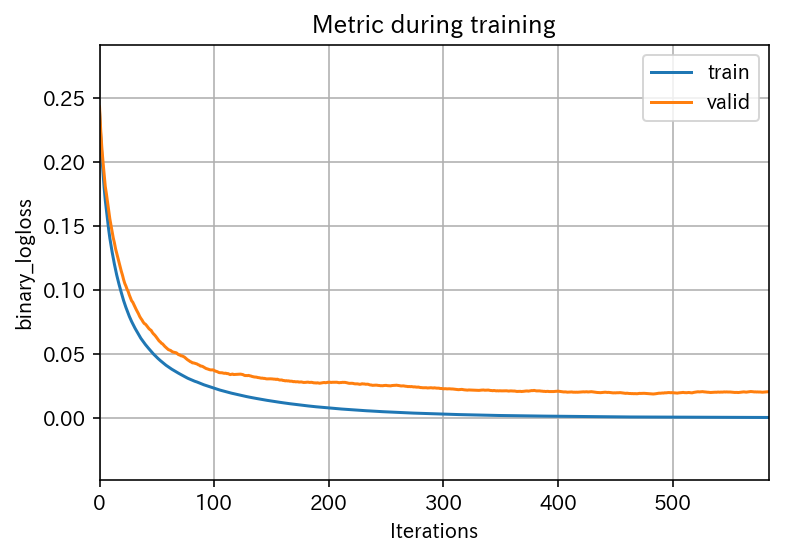

In [125]:
lgb.plot_metric(evals_result, metric='binary_logloss')

### 学習

In [101]:
params = best_params
tmp_params={
    'boosting_type':'gbdt', 
    'objective':'binary',
    "metric":"binary_logloss", 
    'n_estimators':10000,
    'random_state':0,
    'learning_rate':0.01,
    'max_depth':3,
    "min_chlid_wight":1,
    'gamma':0,
    'colsample_bytree':0.8,
    'subsamples':0.8,
    }
params.update(tmp_params)
params

{'lambda_l1': 0.044450095013901854,
 'lambda_l2': 1.6383879531283288e-06,
 'num_leaves': 3,
 'feature_fraction': 0.52,
 'bagging_fraction': 1.0,
 'bagging_freq': 0,
 'min_child_samples': 20,
 'boosting_type': 'gbdt',
 'objective': 'binary',
 'metric': 'binary_logloss',
 'n_estimators': 10000,
 'random_state': 0,
 'learning_rate': 0.01,
 'max_depth': 3,
 'min_chlid_wight': 1,
 'gamma': 0,
 'colsample_bytree': 0.8,
 'subsamples': 0.8}

In [95]:
evals_result = {}
model = lgb_original.train(params=params,
                  train_set=train,
                  valid_sets=[train, valid],
                  valid_names=['train', 'valid'],
#                   feval=lgb_originalf1_score,
                  num_boost_round=1000,
                  early_stopping_rounds=100,
                  verbose_eval=10,
                  evals_result=evals_result,
                 )

Training until validation scores don't improve for 100 rounds
[10]	train's binary_logloss: 0.225791	train's f1: 0	valid's binary_logloss: 0.234016	valid's f1: 0
[20]	train's binary_logloss: 0.197147	train's f1: 0	valid's binary_logloss: 0.209022	valid's f1: 0
[30]	train's binary_logloss: 0.176273	train's f1: 0	valid's binary_logloss: 0.190097	valid's f1: 0
[40]	train's binary_logloss: 0.159981	train's f1: 0	valid's binary_logloss: 0.175127	valid's f1: 0
[50]	train's binary_logloss: 0.147954	train's f1: 0	valid's binary_logloss: 0.164488	valid's f1: 0
[60]	train's binary_logloss: 0.136203	train's f1: 0.166667	valid's binary_logloss: 0.153287	valid's f1: 0.123457
[70]	train's binary_logloss: 0.126868	train's f1: 0.569106	valid's binary_logloss: 0.144779	valid's f1: 0.464646
[80]	train's binary_logloss: 0.118124	train's f1: 0.614173	valid's binary_logloss: 0.136619	valid's f1: 0.552381
[90]	train's binary_logloss: 0.110363	train's f1: 0.710623	valid's binary_logloss: 0.129114	valid's f1: 

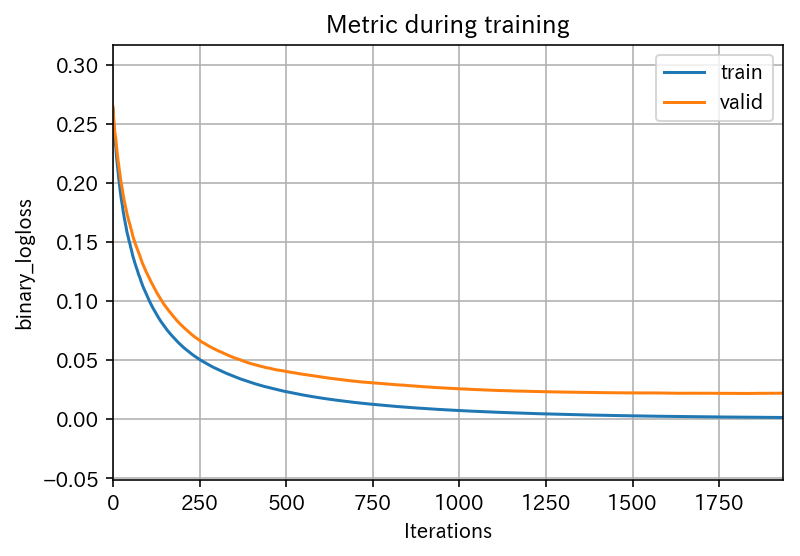

In [97]:
model.plot_metric(evals_result, metric='binary_logloss')

KeyError: 'No given metric in eval results.'

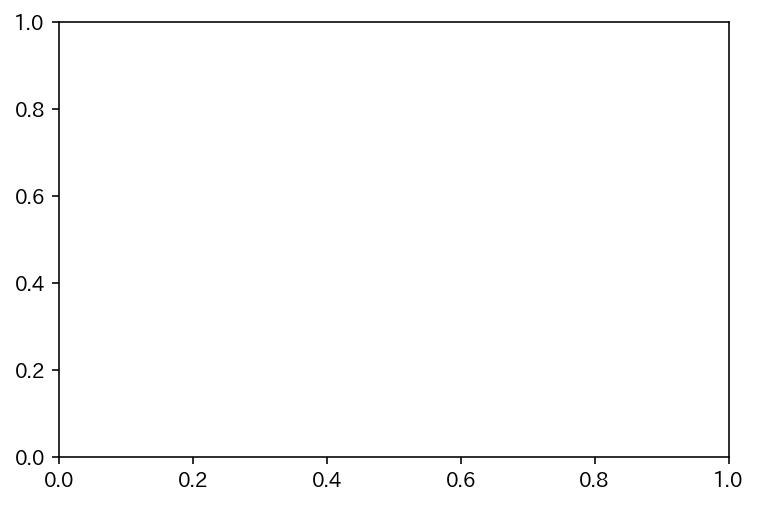

In [98]:
model.plot_metric(evals_result, metric='f1')

### output

In [33]:
y_valid_pred_prob = model.predict(X_valid)

array([2.60075531e-05, 4.89066130e-05, 5.15218924e-05, 1.98944133e-05,
       1.04513837e-04, 2.71540943e-04, 6.23386073e-05, 6.53371638e-05,
       7.93677860e-05, 9.97857512e-01, 2.98128786e-04, 7.62037238e-05,
       5.98016035e-05, 2.70037629e-03, 3.86700395e-05, 4.76229204e-05,
       1.83384645e-05, 4.98167583e-04, 9.64678033e-05, 2.09199611e-01,
       7.21598958e-05, 4.41654328e-03, 1.40300868e-03, 7.18304237e-05,
       1.18667742e-04, 3.24339294e-04, 7.12415458e-04, 1.06899347e-04,
       1.65175945e-04, 3.55268672e-04, 7.49493120e-05, 4.71292247e-04,
       6.55475250e-05, 3.46680345e-05, 5.05069632e-05, 5.00042060e-05,
       2.34652296e-04, 1.03430059e-02, 8.56738665e-06, 1.38442791e-04,
       1.80143885e-04, 1.13392579e-05, 1.24792375e-04, 3.54330094e-03,
       3.02486325e-05, 1.54836333e-04, 1.76264294e-03, 1.24237491e-05,
       3.10111182e-06, 3.92629385e-04, 1.84494928e-04, 1.07881097e-04,
       3.10542848e-03, 1.22038569e-04, 1.32861254e-05, 1.09463966e-04,
      

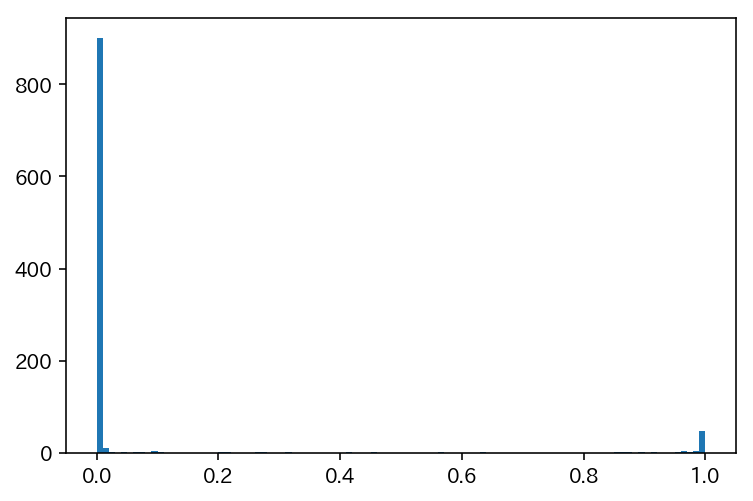

In [34]:
plt.hist(y_valid_pred_prob, bins=100)
plt.show()

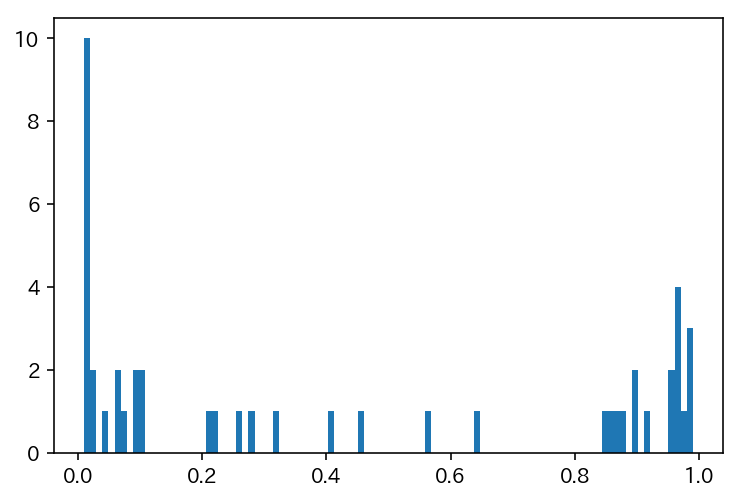

In [35]:
plt.hist(y_valid_pred_prob, bins=100, range=(0.01, 0.99))
plt.show()

In [36]:
def evaluation(y_valid_pred_prob, threshold):
    print("-"*30)
    print("threshold : " + str(threshold))
    print('acc : ' + str(accuracy_score(y_valid==0, (y_valid_pred_prob)<threshold)))
    print('recall : ' + str(recall_score(y_valid==0, (y_valid_pred_prob)<threshold)))
    print('precision : ' + str(precision_score(y_valid==0, (y_valid_pred_prob)<threshold)))
    print('f1 : ' + str(f1_score(y_valid==0, (y_valid_pred_prob)<threshold)))
    cm = confusion_matrix(y_valid==0, (y_valid_pred_prob)<threshold)
    print(cm)
    return f1_score(y_valid==0, (y_valid_pred_prob)<threshold)

In [37]:
f1_best = 0.0
threshold_best = 0.0
for threshold in range(0, 20):
    f1 = evaluation(y_valid_pred_prob, threshold/100)
    if f1 > f1_best:
        f1_best = f1
        threshold_best = threshold/100
print("\n"+"*"*30)
print("best threshold : " + str(threshold_best))
print("best f1_score : " + str(f1_best))
print("*"*30)

------------------------------
threshold : 0.0
acc : 0.07645875251509054
recall : 0.0
precision : 0.0
f1 : 0.0
[[ 76   0]
 [918   0]]
------------------------------
threshold : 0.01
acc : 0.9818913480885312
recall : 0.9803921568627451
precision : 1.0
f1 : 0.99009900990099
[[ 76   0]
 [ 18 900]]
------------------------------
threshold : 0.02
acc : 0.9899396378269618
recall : 0.9901960784313726
precision : 0.9989010989010989
f1 : 0.9945295404814004
[[ 75   1]
 [  9 909]]
------------------------------
threshold : 0.03
acc : 0.9919517102615694
recall : 0.9923747276688453
precision : 0.9989035087719298
f1 : 0.9956284153005464
[[ 75   1]
 [  7 911]]
------------------------------
threshold : 0.04
acc : 0.9919517102615694
recall : 0.9923747276688453
precision : 0.9989035087719298
f1 : 0.9956284153005464
[[ 75   1]
 [  7 911]]
------------------------------
threshold : 0.05
acc : 0.9929577464788732
recall : 0.9934640522875817
precision : 0.9989047097480832
f1 : 0.996176952484981
[[ 75   1]
 

In [38]:
importance = model.feature_importance(importance_type='gain')
importance = pd.DataFrame(importance, index=col_name, columns=['importance']).sort_values('importance', ascending=False)
importance = importance.iloc[0:100, :]

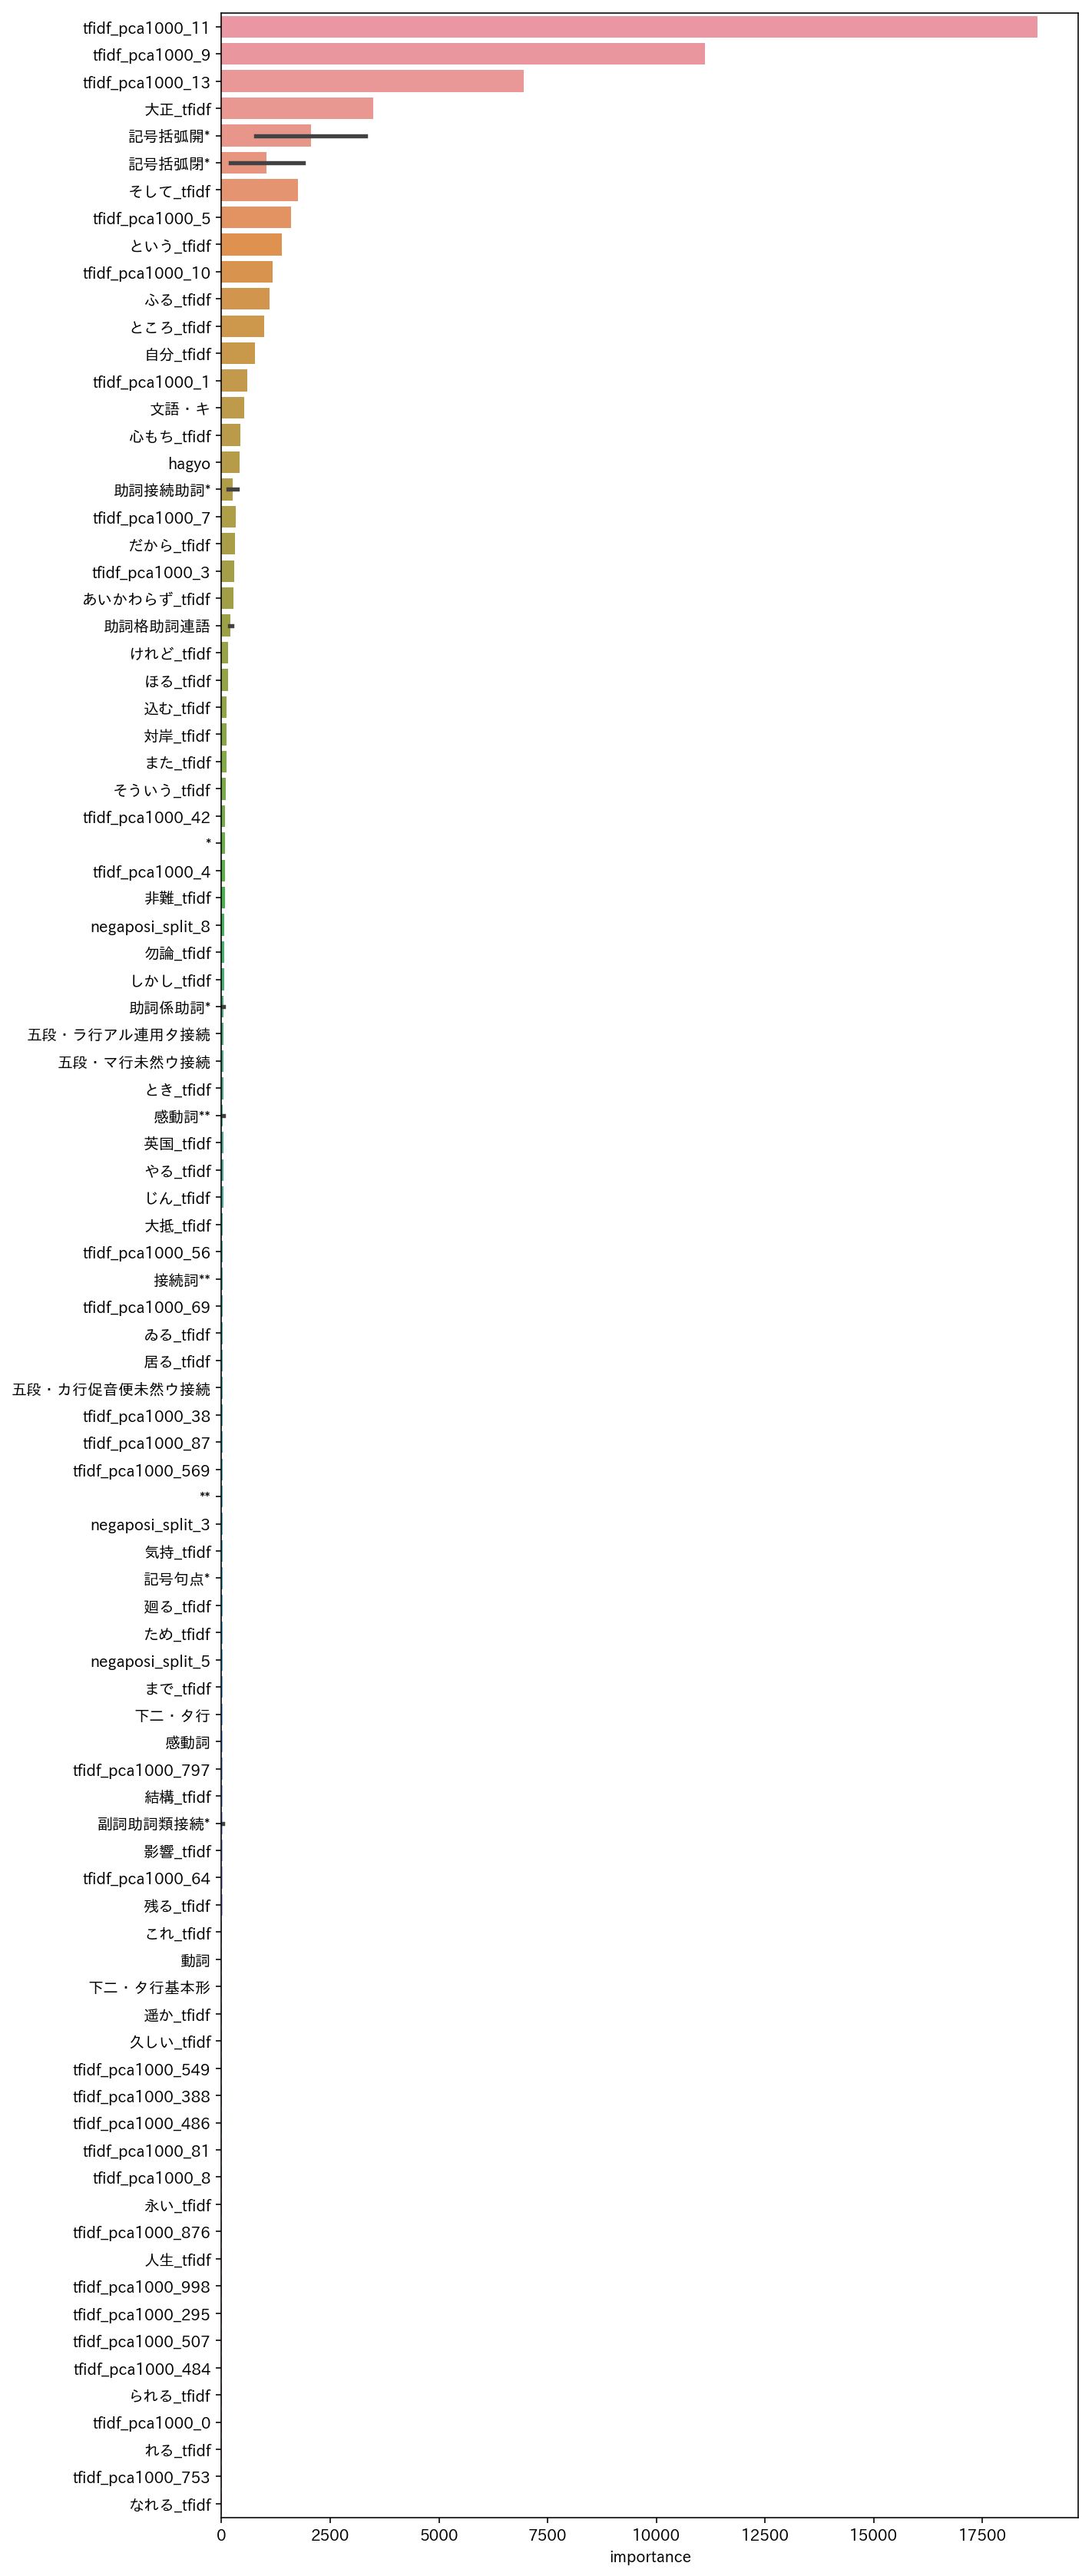

In [39]:
plt.figure(figsize=(10, 30))
sns.barplot(x = importance['importance'], y = importance.index)
plt.show()

In [40]:
importance = model.feature_importance(importance_type='split')
importance = pd.DataFrame(importance, index=col_name, columns=['importance']).sort_values('importance', ascending=False)
importance = importance.iloc[0:100, :]

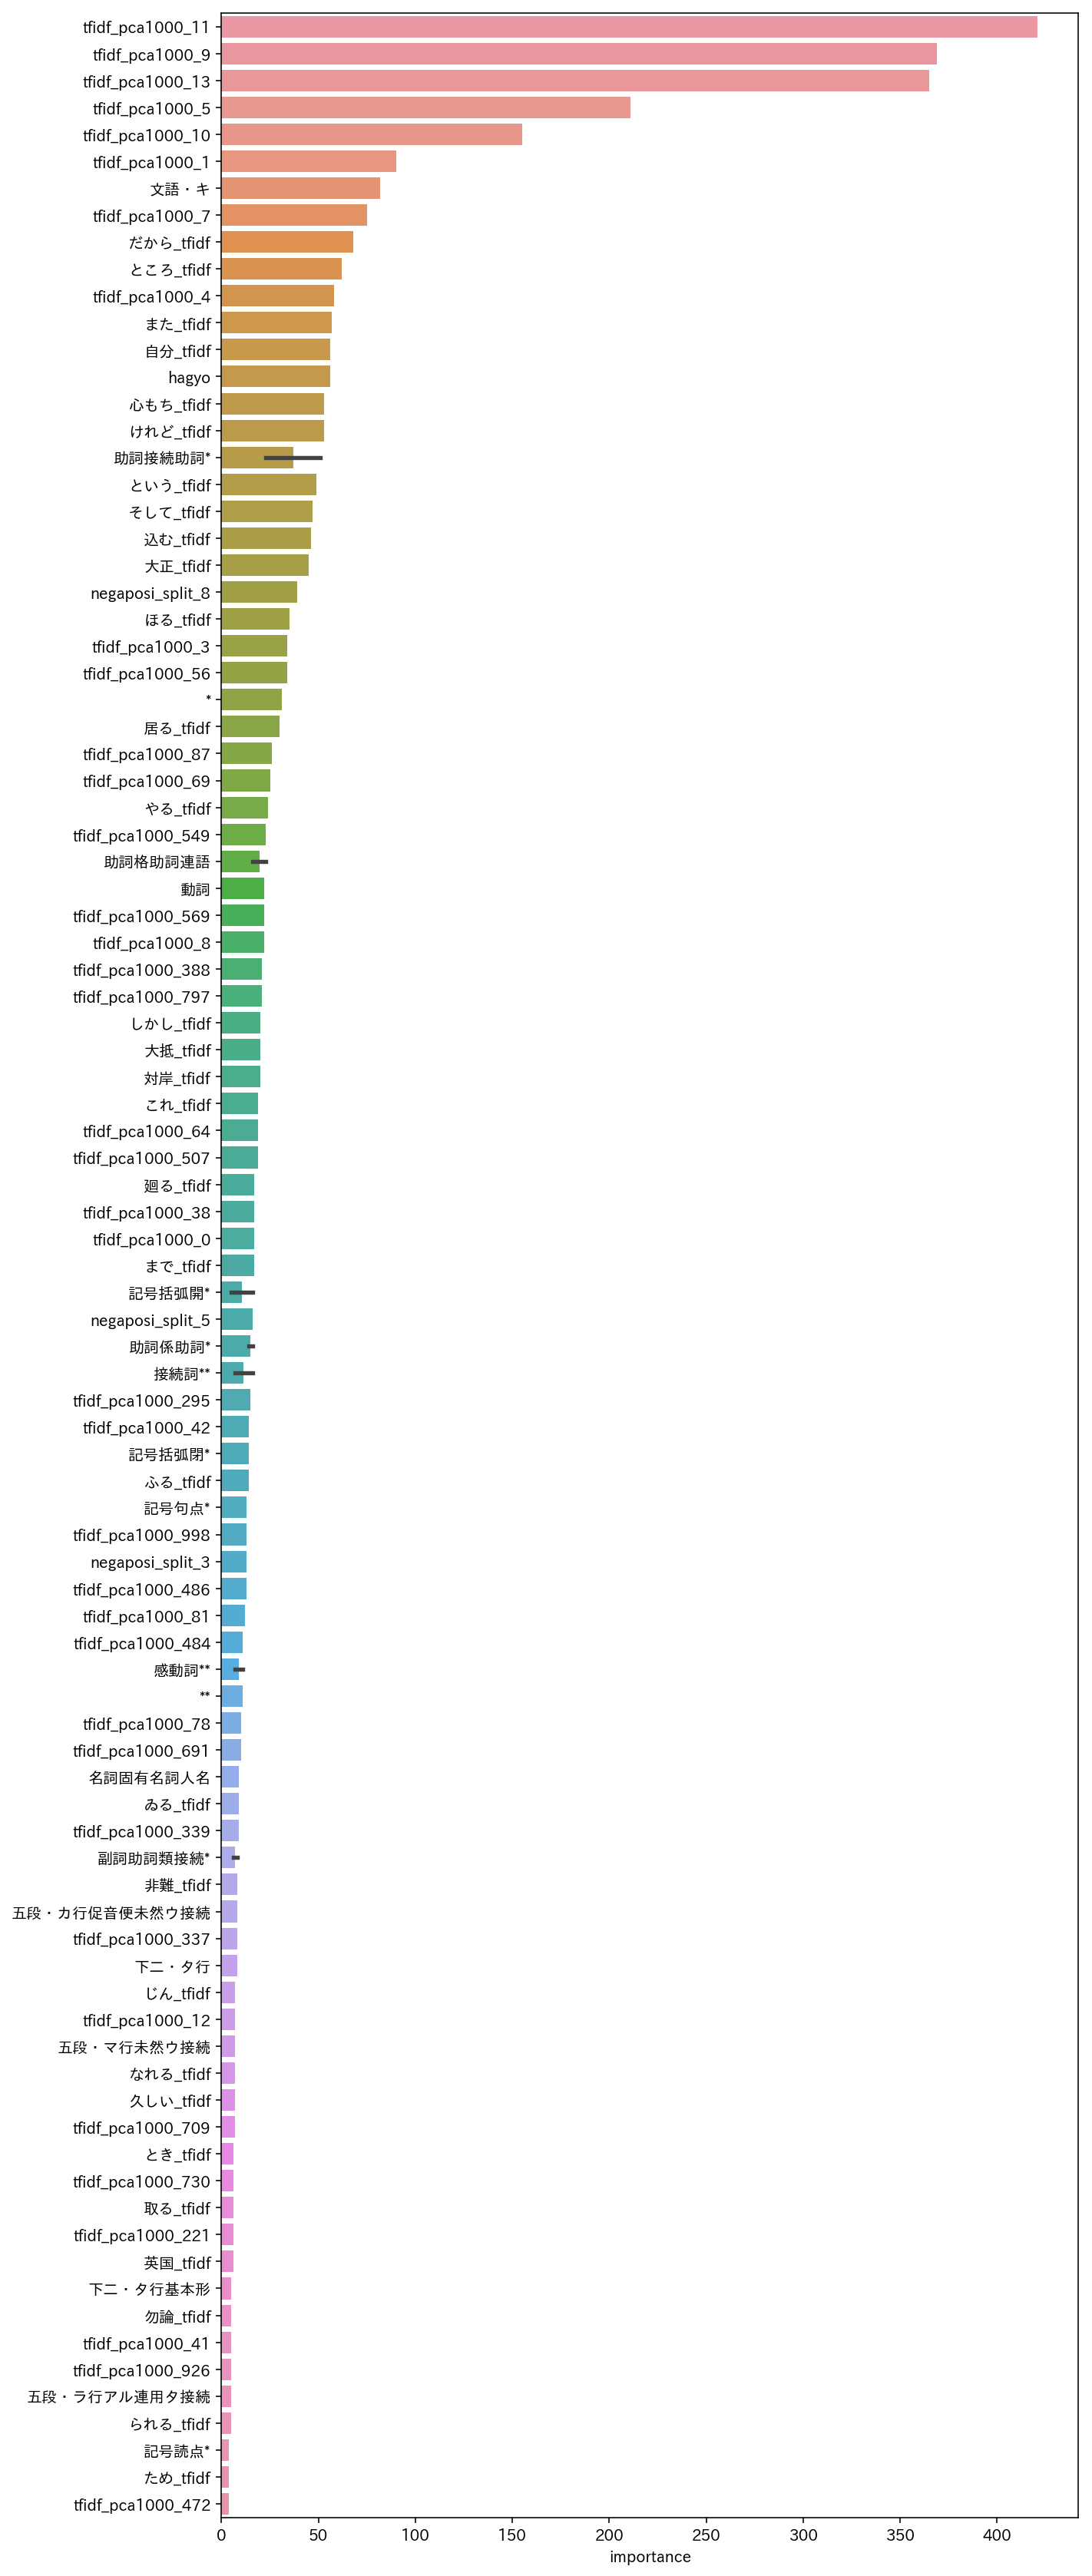

In [41]:
plt.figure(figsize=(10, 30))
sns.barplot(x = importance['importance'], y = importance.index)
plt.show()

In [43]:
y_test = model.predict(X_test)

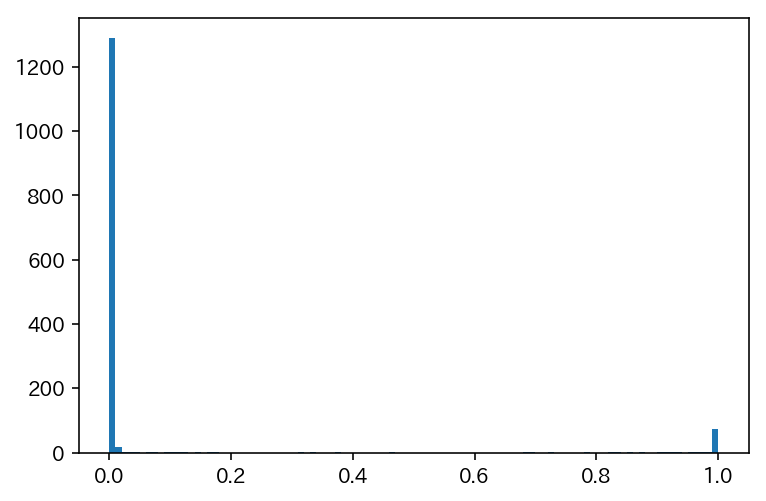

In [44]:
plt.hist(y_test, bins=100)
plt.show()

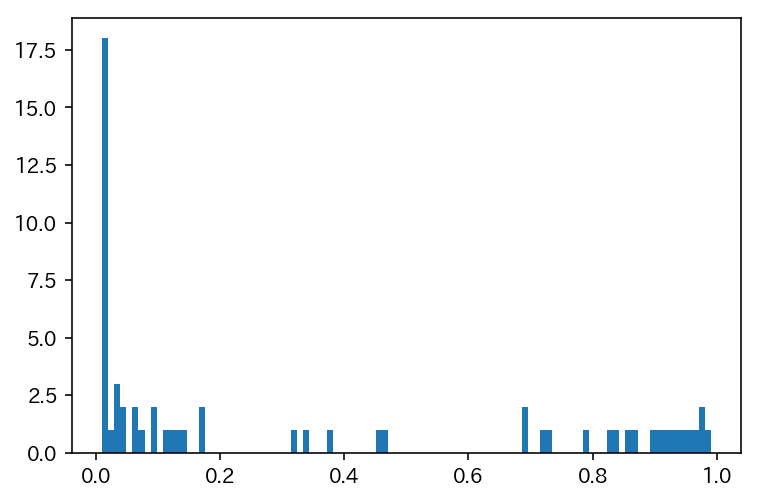

In [45]:
plt.hist(y_test, bins=100, range=(0.01, 0.99))
plt.show()

In [46]:
print("threshold_best : " + str(threshold_best))
print("akutagawa : " + str(sum((y_test > threshold_best)*1)))
print("not akutagawa : " + str(sum((y_test <= threshold_best)*1)))

threshold_best : 0.08
akutagawa : 105
not akutagawa : 1315


In [47]:
submit_sample = pd.read_csv("../input/sample_submission.csv", index_col=0)

In [48]:
train_akutagawa_rate = y_train["target"].value_counts()[0]/(y_train["target"].value_counts()[0]+y_train["target"].value_counts()[1])
test_akutagawa_rate = submit_sample["author"].value_counts()[0]/(submit_sample["author"].value_counts()[0]+submit_sample["author"].value_counts()[1])

In [50]:
submit_sample["author"] = (y_test > threshold_best)*1
# submit_sample["author"] = (y_test > (1.0 - train_akutagawa_rate))*1

train_akutagawa_rate = y_train["target"].value_counts()[0]/(y_train["target"].value_counts()[0]+y_train["target"].value_counts()[1])
test_akutagawa_rate = submit_sample["author"].value_counts()[0]/(submit_sample["author"].value_counts()[0]+submit_sample["author"].value_counts()[1])
print(train_akutagawa_rate)
print(test_akutagawa_rate)
submit_sample

0.9240724762726489
0.926056338028169


,author
writing_id,
4,0
5,0
6,0
10,0
11,0
13,0
18,0
21,0
26,0


In [51]:
submit_sample.to_csv("../output/submission_0126_3.csv")